<a href="https://colab.research.google.com/github/sabitendu/Capstone-Project-On-Appliance_Energy_Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


### Dataset Loading

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the dataset from drive
filepath='/content/drive/MyDrive/Alma Better/Machine Learning/Appliance_Energy_Prediction/data_application_energy.csv'
df_energy=pd.read_csv(filepath)

### Dataset First View

In [4]:
# # Viewing the top 5 rows to take a glimpse of the data
df_energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df_energy.shape

(19735, 29)

In [6]:
print(f"the number of rows {df_energy.shape[0]}, and number of columns are {df_energy.shape[1]}")

the number of rows 19735, and number of columns are 29


### Dataset Information

In [7]:
# Dataset Info
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  



*   We have 29 columns and maximum columns are numerical except date
*   We have to convert the date column into datetime format



#### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [8]:
# Dataset Duplicate Value Count
value = len(df_energy[df_energy.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

#### Missing Values/Null Values

##**Why dealing with missing values is necessary?**

Numerous missing values are frequently present in real-world data, which may be the result of data corruption or another issue. In order to handle missing values during the dataset pre-processing step, as many machine-learning algorithms do not support them. Consequently, identifying the missing values is the first step in dealing with missing data.

In [9]:
# Missing Values/Null Values Count
df_energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: >

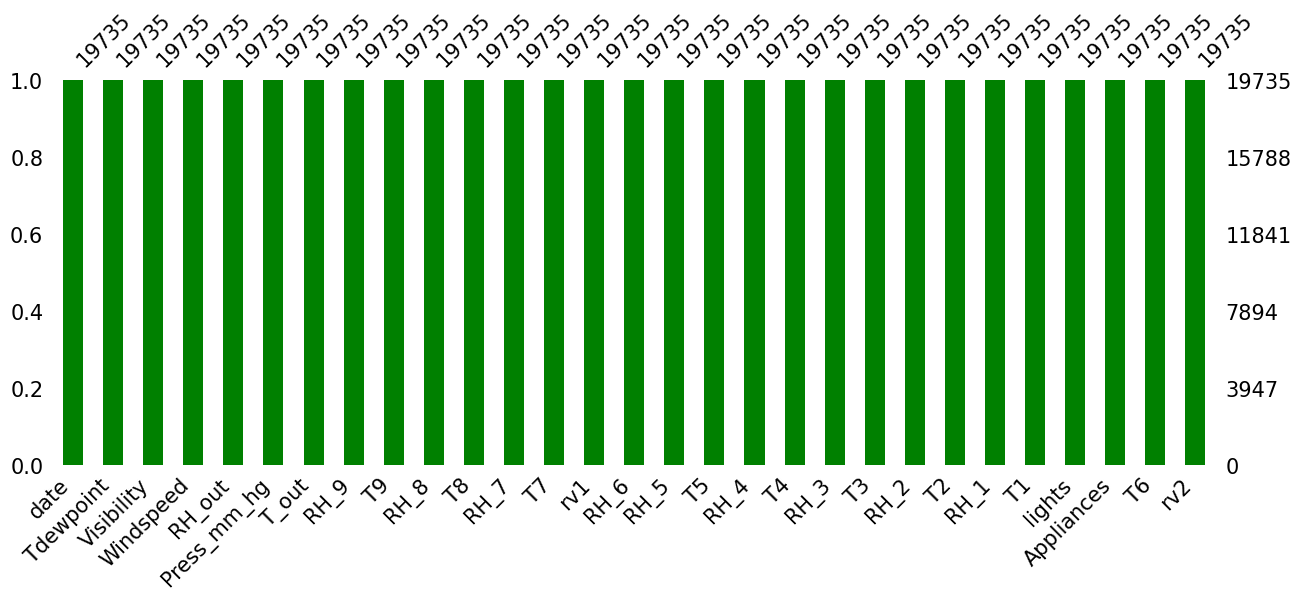

In [10]:
# Visualizing the missing values
msno.bar(df_energy, color='green',sort='ascending', figsize=(15,5), fontsize=15)

From the above command and figure, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

* The dataset provided contains 29 columns and 19735 rows and does not have any missing or duplicate values.


* The goal is to predict the energy use of appliances. Demand prediction involves analytical studies on the probability of house temperature and humidity conditions, which were monitored with a ZigBee wireless sensor network for 10 minutes for about 4.5 months.

* There are no duplicate columns

* There are no missing values

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df_energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [12]:
# Dataset Describe
df_energy.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

### Variables Description

**Date time year-**month-day hour:minute:second

**Appliances-** energy use in Wh

**Lights-** energy use of light fixtures in the house in Wh

**T1-** Temperature in kitchen area, in Celsius

**RH_1-** Humidity in kitchen area, in %

**T2-**Temperature in living room area, in Celsius

**RH_2-** Humidity in living room area, in %

**T3-** Temperature in laundry room area

**RH_3-** Humidity in laundry room area, in %

**T4-** Temperature in office room, in Celsius

**RH_4-** Humidity in office room, in %

**T5-** Temperature in bathroom, in Celsius

**RH_5-** Humidity in bathroom, in %

**T6-** Temperature outside the building (north side), in Celsius

**RH_6-** Humidity outside the building (north side), in %

**T7-**Temperature in ironing room , in Celsius

**RH_7-** Humidity in ironing room, in %

**T8-** Temperature in teenager room 2, in Celsius

**RH_8-** Humidity in teenager room 2, in %

**T9-**Temperature in parents room, in Celsius

**RH_9-** Humidity in parents room, in %

**To-**Temperature outside (from Chievres weather station), in Celsius

**Pressure (from Chievres weather station)-** in mm Hg

**RH_out-** Humidity outside (from Chievres weather station), in %

**Wind speed (from Chievres weather station)-** in m/s

**Visibility (from Chievres weather station)-**in km

**Tdewpoint (from Chievres weather station)-** Â°C

**rv1-** Random variable 1, nondimensional

**rv2-** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df_energy.columns.tolist():
  print("No. of unique values in ",i,"is",df_energy[i].nunique())


No. of unique values in  date is 19735
No. of unique values in  Appliances is 92
No. of unique values in  lights is 8
No. of unique values in  T1 is 722
No. of unique values in  RH_1 is 2547
No. of unique values in  T2 is 1650
No. of unique values in  RH_2 is 3376
No. of unique values in  T3 is 1426
No. of unique values in  RH_3 is 2618
No. of unique values in  T4 is 1390
No. of unique values in  RH_4 is 2987
No. of unique values in  T5 is 2263
No. of unique values in  RH_5 is 7571
No. of unique values in  T6 is 4446
No. of unique values in  RH_6 is 9709
No. of unique values in  T7 is 1955
No. of unique values in  RH_7 is 5891
No. of unique values in  T8 is 2228
No. of unique values in  RH_8 is 6649
No. of unique values in  T9 is 924
No. of unique values in  RH_9 is 3388
No. of unique values in  T_out is 1730
No. of unique values in  Press_mm_hg is 2189
No. of unique values in  RH_out is 566
No. of unique values in  Windspeed is 189
No. of unique values in  Visibility is 413
No. of uni

## 3. ***Data Wrangling***

### Data Wrangling Code

## Renaming The Columns according to the Variable Description.

In [14]:
#rename the columns
df_energy.rename(columns={'T1': 'temp_kitchen', 'RH_1':'hu_Kitchen', 'T2':'temp_living_room', 'RH_2': 'hu_living', 'T3':'temp_Laundry_room',
       'RH_3':'hu_laundry', 'T4':'temp_office_room', 'RH_4':'hu_office', 'T5':'temp_bathroom', 'RH_5':'hu_bath', 'T6':'temp_build_out'
       , 'RH_6':'hu_build_out', 'T7':'temp_ironing_room', 'RH_7':'hu_ironing_room', 'T8':'temp_teen_room',
       'RH_8':'hu_teen', 'T9':'temp_parents_room', 'RH_9':'hu_parent', 'T_out':'temp_out', 'RH_out':'out_humidity'},inplace = True)

In [15]:
# Changing the data format of date column
df_energy['date']=pd.to_datetime(df_energy['date'])

In [16]:
#Getting the months and days from date

df_energy['month'] = df_energy['date'].dt.month
df_energy['weekday'] = df_energy['date'].dt.weekday
df_energy['hour'] = df_energy['date'].dt.hour


In [17]:
#drop the date column
df_energy.drop('date',axis=1,inplace=True)

In [18]:
#look at first five rows after rename the column
df_energy.head()

Appliances  lights  temp_kitchen  hu_Kitchen  temp_living_room  hu_living  \
0          60      30         19.89   47.596667              19.2  44.790000   
1          60      30         19.89   46.693333              19.2  44.722500   
2          50      30         19.89   46.300000              19.2  44.626667   
3          50      40         19.89   46.066667              19.2  44.590000   
4          60      40         19.89   46.333333              19.2  44.530000   

   temp_Laundry_room  hu_laundry  temp_office_room  hu_office  ...  \
0              19.79   44.730000         19.000000  45.566667  ...   
1              19.79   44.790000         19.000000  45.992500  ...   
2              19.79   44.933333         18.926667  45.890000  ...   
3              19.79   45.000000         18.890000  45.723333  ...   
4              19.79   45.000000         18.890000  45.530000  ...   

   Press_mm_hg  out_humidity  Windspeed  Visibility  Tdewpoint        rv1  \
0        733.5          92.0   7.000000   63.000000        5.3  13.275433   
1        733.6          92.0   6.666667   59.166667        5.2  18.606195   
2        733.7          92.0   6.333333   55.333333        5.1  28.642668   
3        733.8          92.0   6.000000   51.500000        5.0  45.410389   
4        733.9          92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  
0  13.275433      1        0    17  
1  18.606195      1        0    17  
2  28.642668      1        0    17  
3  45.410389      1        0    17  
4  10.084097      1        0    17  

[5 rows x 31 columns]

### What all manipulations have you done and insights you found?

1. Splitting date columns into year, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date and year columns due to no further use of them.
4. Renaming of some features, for better understanding and readibility.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Appliance Energy Column

<Axes: xlabel='hour', ylabel='Appliances'>

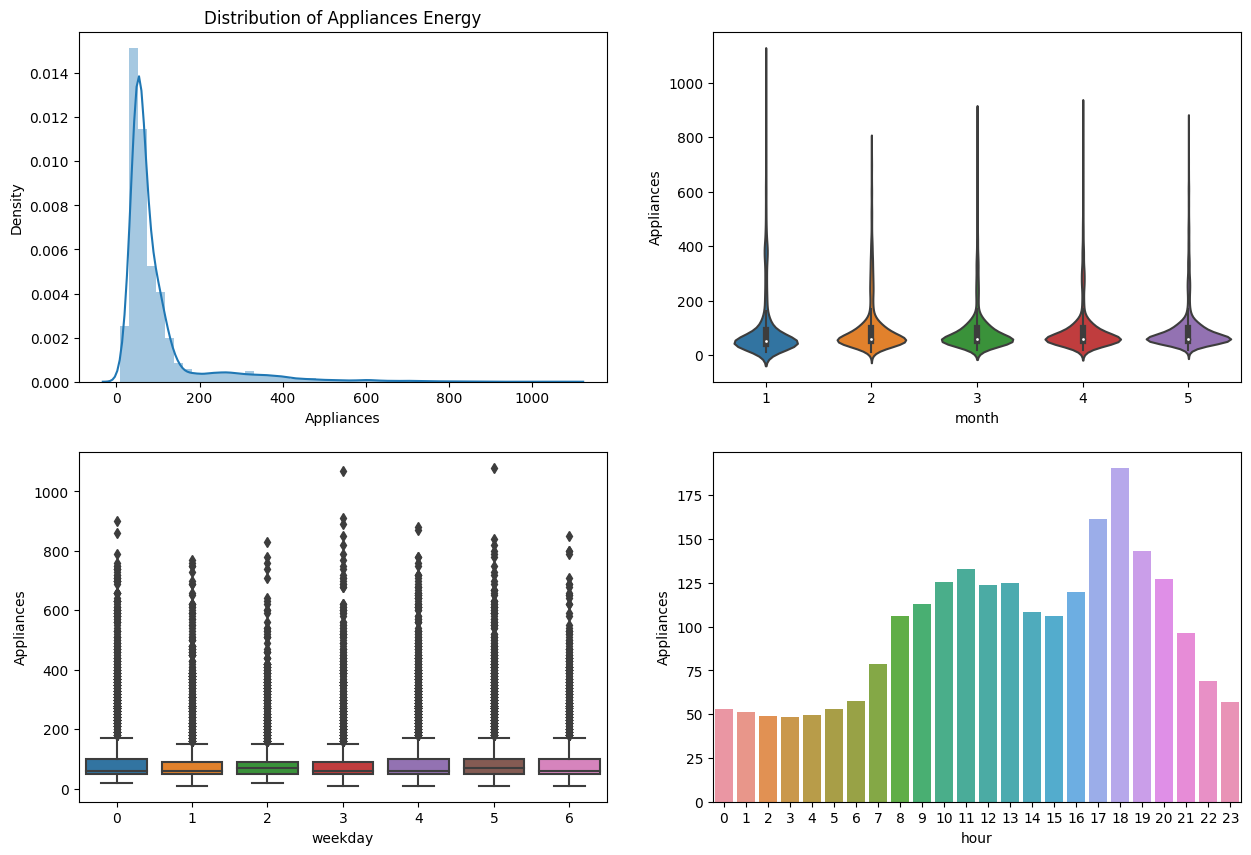

In [19]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df_energy['Appliances'],ax=ax[0,0])
dist.set_title('Distribution of Appliances Energy')

#Average Appliances Energy over month
month_eng=pd.DataFrame(df_energy.groupby('month')['Appliances'].mean()).reset_index()
sns.violinplot(x=df_energy['month'],y=df_energy['Appliances'], ax=ax[0,1])

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(df_energy.groupby('weekday')['Appliances'].mean()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df_energy['weekday'],y=df_energy['Appliances'],ax=ax[1,0])
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df_energy.groupby('hour')['Appliances'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['Appliances'],ax=ax[1,1])

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

*  Violin plots depict summary statistics and the density of each variable.

* Box plots are used to show distributions of numeric data values and compare them between multiple groups.

* Bar plots enables to compare categorical data in dependency of numerical data

##### 2. What is/are the insight(s) found from the chart?

* Appliances Enegry has positive skewness. A log transformation can make it normal. Most of the values are around 100 Wh. Outliers are also present in the column.

*  In the month of January, the energy usage is high compared to the other months, and February has low energy consumption.

* On Thursday and Saturday, the energy usage is high compared to the other days, and Tuesday has low energy consumption.

* In the hours of the day, 8 hrs to 21 hrs have high energy consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the hours of the day from 00 hrs. to 07 hrs., we can save the most energy and send the excess power to the grid. In the weeks of Tuesday and February, we can save the most money on power usage.

#### Kitchen Temperature and Kitchen Humidity

[Text(0.5, 0, 'hu_Kitchen'),
 Text(0, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs kitchen humidity')]

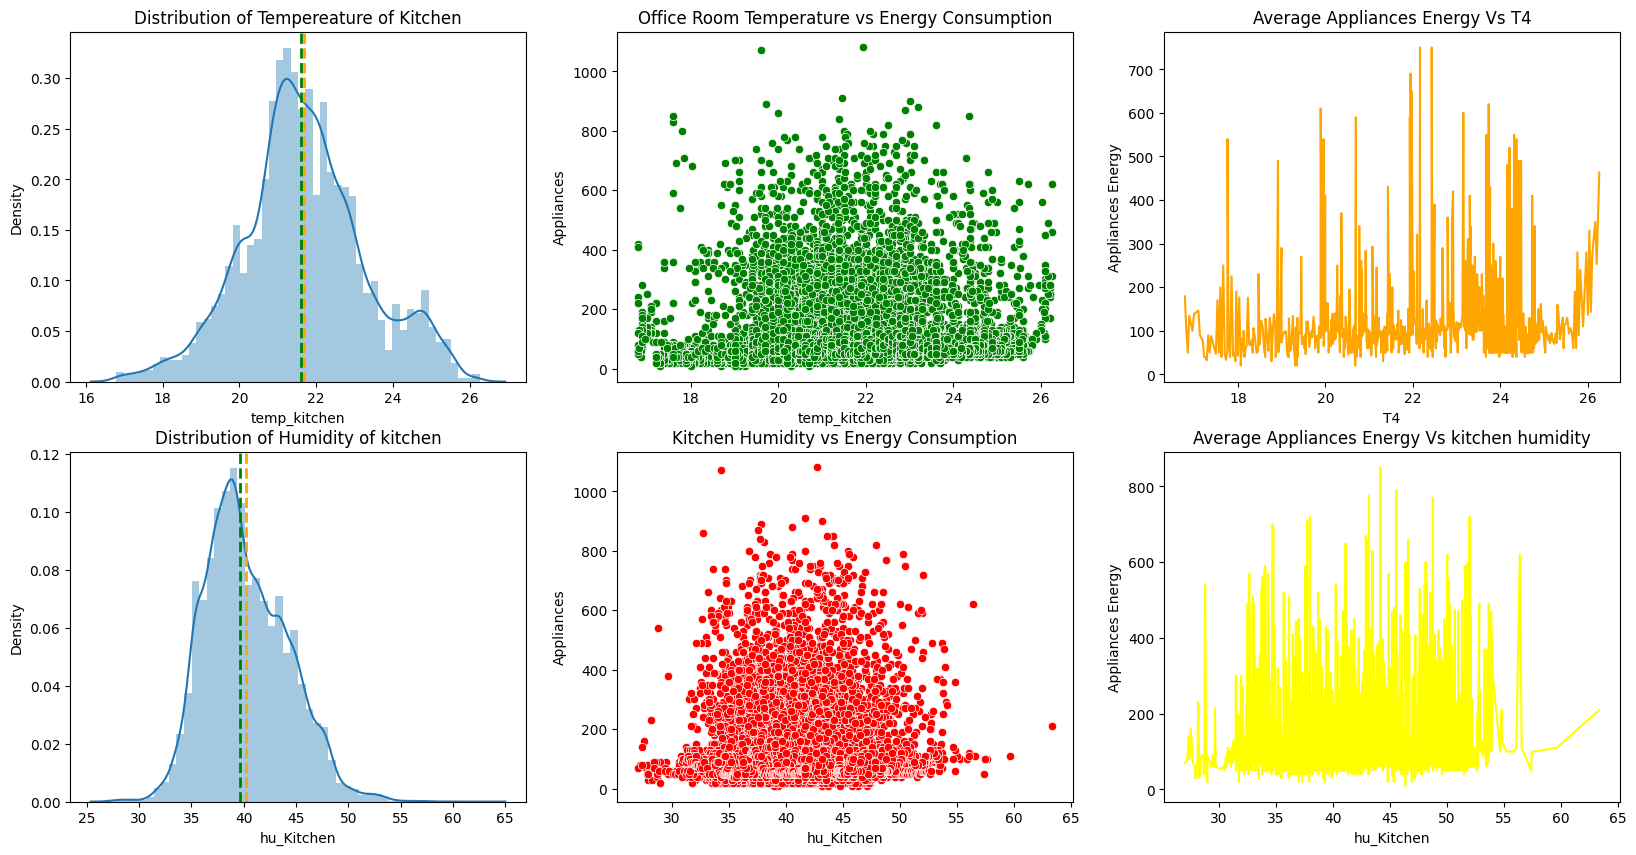

In [22]:
fig,ax = plt.subplots(2,3, figsize=(20,10))

#Distribution of the T4
dist_T1 = sns.distplot(df_energy['temp_kitchen'], ax=ax[0,0]);
dist_T1.set_title('Distribution of Tempereature of Kitchen', size=12)
ax[0,0].axvline(df_energy['temp_kitchen'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['temp_kitchen'].median(), color='green', linestyle='dashed', linewidth=2)

#Bivariate Analysis
#  Appliances Energy vs T4
scatter_T1=sns.scatterplot(data=df_energy,x='temp_kitchen',y='Appliances',color='green',ax=ax[0,1]);
scatter_T1.set_title('Office Room Temperature vs Energy Consumption',size=12)

#Average Appliances Energy vs T4
group_T1=df_energy.groupby(['temp_kitchen'])['Appliances'].mean().reset_index()
line_T1 = sns.lineplot(data=group_T1, x='temp_kitchen', y = 'Appliances',color='orange', ax= ax[0,2]);
line_T1.set(xlabel='T4', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs T4')

#Distribution of the officeromm humidty
dist_RH1 = sns.distplot(df_energy['hu_Kitchen'], ax=ax[1,0]);
dist_RH1.set_title('Distribution of Humidity of kitchen', size=12)
ax[1,0].axvline(df_energy['hu_Kitchen'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['hu_Kitchen'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of RH4 with Appliances
scatter_RH1=sns.scatterplot(data=df_energy,x='hu_Kitchen',y='Appliances',color='red',ax=ax[1,1]);
scatter_RH1.set_title('Kitchen Humidity vs Energy Consumption',size=12)

#Average Appliances Energy vs RH_4
group_RH1=df_energy.groupby(['hu_Kitchen'])['Appliances'].mean().reset_index()
line_RH1 = sns.lineplot(data=group_RH1, x='hu_Kitchen', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RH1.set(xlabel='hu_Kitchen', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs kitchen humidity')


##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* kitchen temperature distribution is normally distributed, with a mean and median value around 21 degrees Celsius.

* When kitchen temperature is low, energy used is low, and when it is above 18 degrees celsius, the spread of energy used is wide.

* The mean value of energy used is low below 18 degrees celsius of officeroom temperature, and it is high between 18 and 22 degrees celsius. After that, the mean energy value slightly decreases.

* The distribution of officeroom humidity is very low and positively skewd. The mean and median values of humidity are 39 and 38.

* When humidity is below 32 percent, the spread of energy used data is very low, and above that, the data is highly spread.

* The mean value of appliance energy is low below 31 percent humidity and around 47 percent humidity; other than that, the mean value is high.

#### Office Temperature and Office Humidity

[Text(0.5, 0, 'RH_4'),
 Text(0, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs RH_4')]

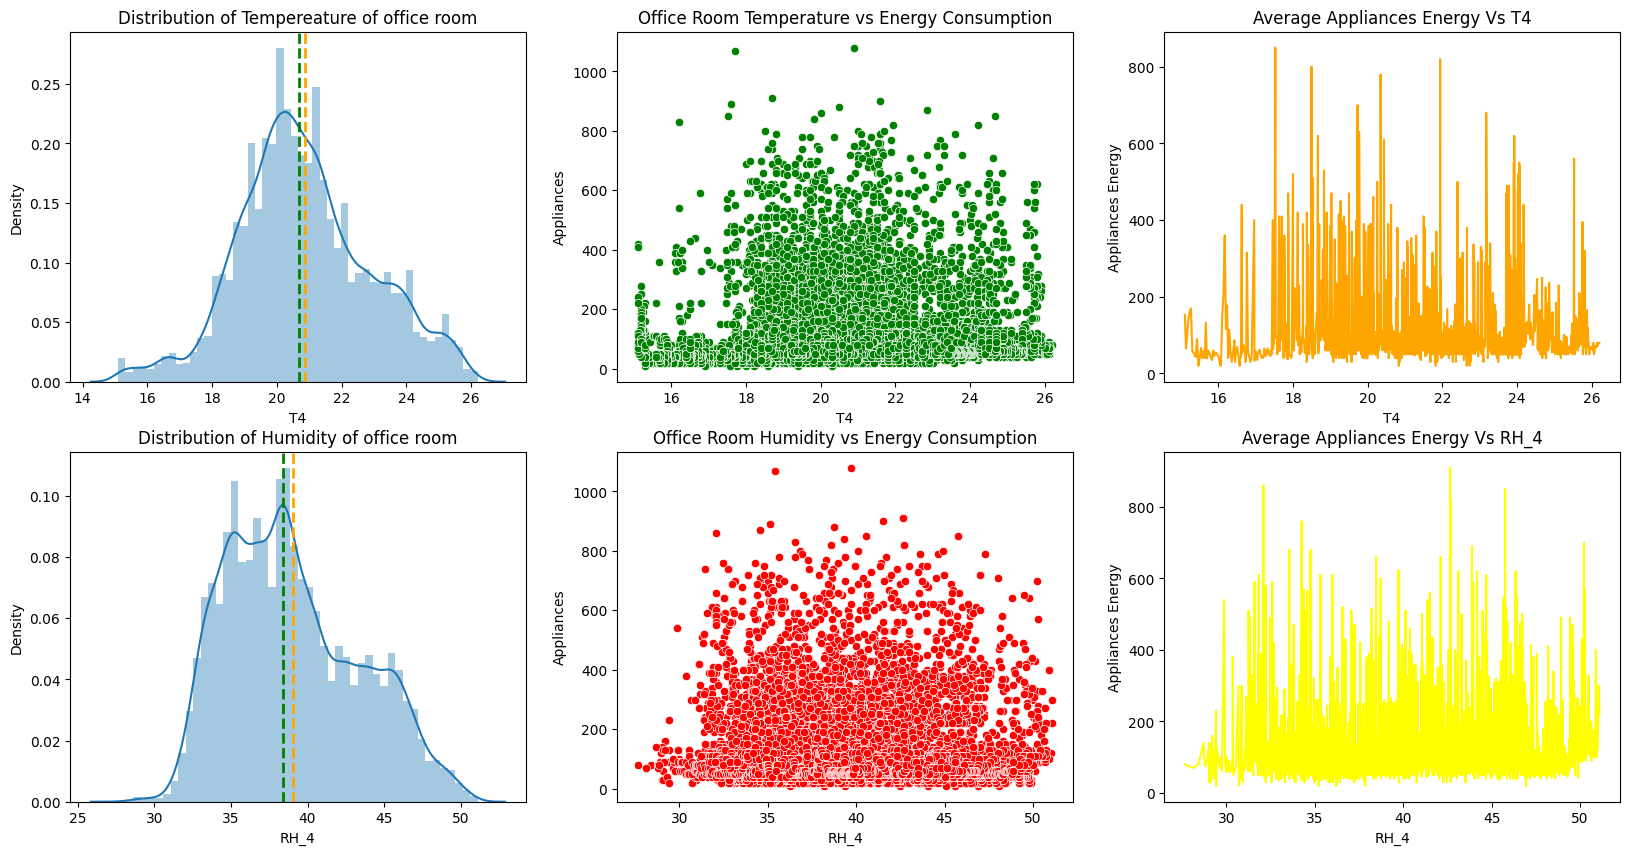

In [19]:
fig,ax = plt.subplots(2,3, figsize=(20,10))

#Distribution of the T4
dist_T4 = sns.distplot(df_energy['T4'], ax=ax[0,0]);
dist_T4.set_title('Distribution of Tempereature of office room', size=12)
ax[0,0].axvline(df_energy['T4'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['T4'].median(), color='green', linestyle='dashed', linewidth=2)

#Bivariate Analysis
#  Appliances Energy vs T4
scatter_T4=sns.scatterplot(data=df_energy,x='T4',y='Appliances',color='green',ax=ax[0,1]);
scatter_T4.set_title('Office Room Temperature vs Energy Consumption',size=12)

#Average Appliances Energy vs T4
group_T4=df_energy.groupby(['T4'])['Appliances'].mean().reset_index()
line_T4 = sns.lineplot(data=group_T4, x='T4', y = 'Appliances',color='orange', ax= ax[0,2]);
line_T4.set(xlabel='T4', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs T4')

#Distribution of the officeromm humidty
dist_RH4 = sns.distplot(df_energy['RH_4'], ax=ax[1,0]);
dist_RH4.set_title('Distribution of Humidity of office room', size=12)
ax[1,0].axvline(df_energy['RH_4'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['RH_4'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of RH4 with Appliances
scatter_RH4=sns.scatterplot(data=df_energy,x='RH_4',y='Appliances',color='red',ax=ax[1,1]);
scatter_RH4.set_title('Office Room Humidity vs Energy Consumption',size=12)

#Average Appliances Energy vs RH_4
group_RH4=df_energy.groupby(['RH_4'])['Appliances'].mean().reset_index()
line_RH4 = sns.lineplot(data=group_RH4, x='RH_4', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RH4.set(xlabel='RH_4', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs RH_4')


##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* Officeroom temperature distribution is normally distributed, with a mean and median value around 21 degrees Celsius.

* When officeroom temperature is low, energy used is low, and when it is above 18 degrees celsius, the spread of energy used is wide.

* The mean value of energy used is low below 18 degrees celsius of officeroom temperature, and it is high between 18 and 22 degrees celsius. After that, the mean energy value slightly decreases.

* The distribution of officeroom humidity is very low and positively skewd. The mean and median values of humidity are 39 and 38.

* When humidity is below 32 percent, the spread of energy used data is very low, and above that, the data is highly spread.

* The mean value of appliance energy is low below 31 percent humidity and around 47 percent humidity; other than that, the mean value is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When the office room temperature is below 18 degrees Celsius and the office room humidity is below 32, we can save the maximum energy.

#### Bathroom Temperature and Bathroom Humidity

[Text(0.5, 0, 'RH_5'),
 Text(0, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs RH_5')]

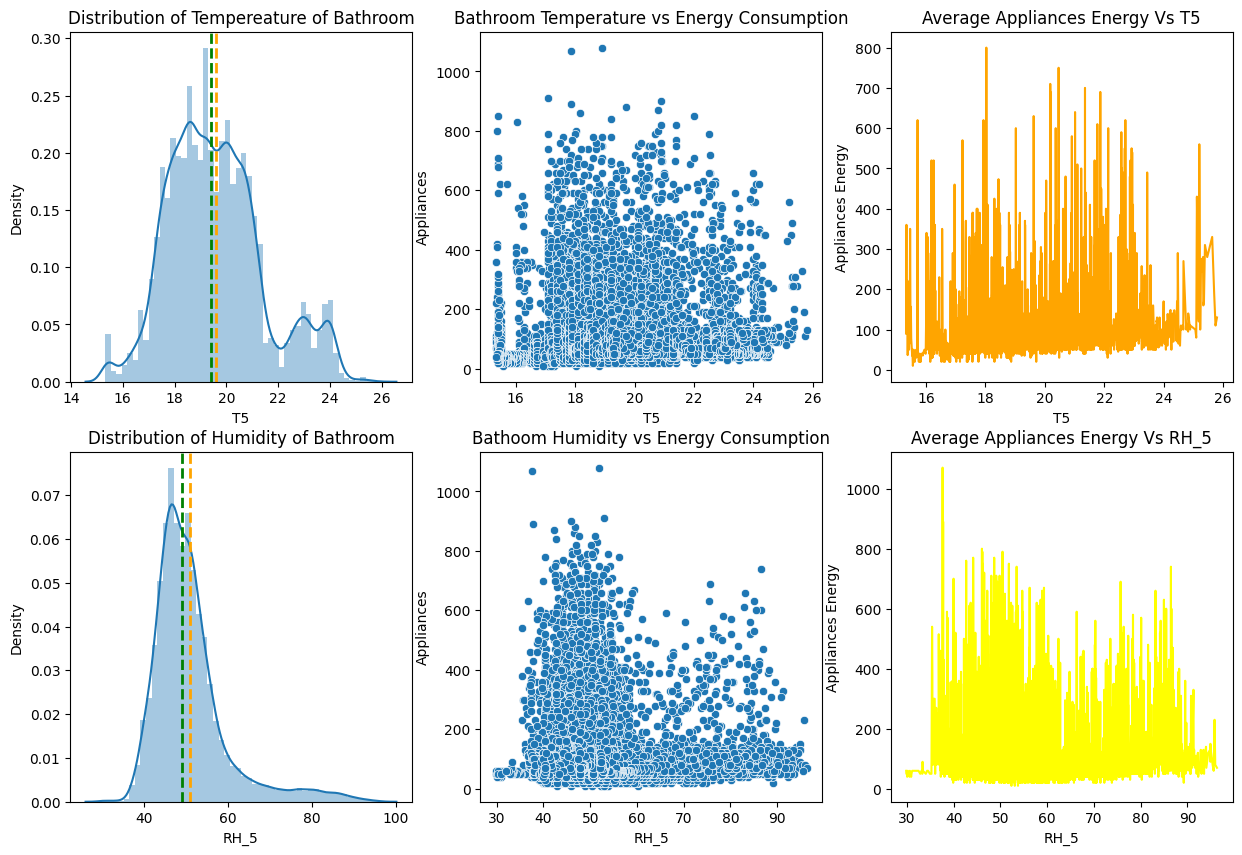

In [20]:
# Chart - 3 visualization code
fig,ax = plt.subplots(2,3, figsize=(15,10))

#Distribution of the T5
dist = sns.distplot(df_energy['T5'], ax=ax[0,0])
dist.set_title('Distribution of Tempereature of Bathroom', size=12)
ax[0,0].axvline(df_energy['T5'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['T5'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of T5 with Appliances
scatter=sns.scatterplot(data=df_energy,x='T5',y='Appliances',ax=ax[0,1])
scatter.set_title('Bathroom Temperature vs Energy Consumption',size=12)

#Average Appliances Energy vs T5
group_T5=df_energy.groupby(['T5'])['Appliances'].mean().reset_index()
line_T5 = sns.lineplot(data=group_T5, x='T5', y = 'Appliances',color='orange', ax= ax[0,2]);
line_T5.set(xlabel='T5', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs T5')

#Distribution of the officeromm humidty
dist = sns.distplot(df_energy['RH_5'], ax=ax[1,0])
dist.set_title('Distribution of Humidity of Bathroom', size=12)
ax[1,0].axvline(df_energy['RH_5'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['RH_5'].median(), color='green', linestyle='dashed', linewidth=2)



#Bivariate Analysis of RH4 with Appliances
scatter=sns.scatterplot(data=df_energy,x='RH_5',y='Appliances',ax=ax[1,1])
scatter.set_title('Bathoom Humidity vs Energy Consumption',size=12)

#Average Appliances Energy vs RH_5
group_RH5=df_energy.groupby(['RH_5'])['Appliances'].mean().reset_index()
line_RH5 = sns.lineplot(data=group_RH5, x='RH_5', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RH5.set(xlabel='RH_5', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs RH_5')


##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* Bathroom temperature distribution is normally distributed, with a mean and median value around 19 degrees Celsius.

* When Bathroom temperature is low, energy used is low, and when it is above 17 degrees celsius, the spread of energy used is wide.

* The mean value of energy used is low  below 17 degrees celsius of Bathroom temperature, and it is high between 17 and 24 degrees celsius. After that, the mean energy value slightly decreases.

* The distribution of officeroom humidity is fairly symmtrical means normally distributed. The mean and median values of humidity are 39 and 38.

* When bathroom humidity is between 35 percent and 60 percent, the spread of energy used data is high.

* The mean value of appliance energy is exceptionally high near 40 percent humidity and exceptionally low near 65 percent humidity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When the  bathroom temperature is below 17 degrees Celsius and the office room humidity is below 35, we can save the maximum energy.

#### Outside of the building Temperature and Humidity

[Text(0.5, 0, 'RH_6'),
 Text(0, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs RH_6')]

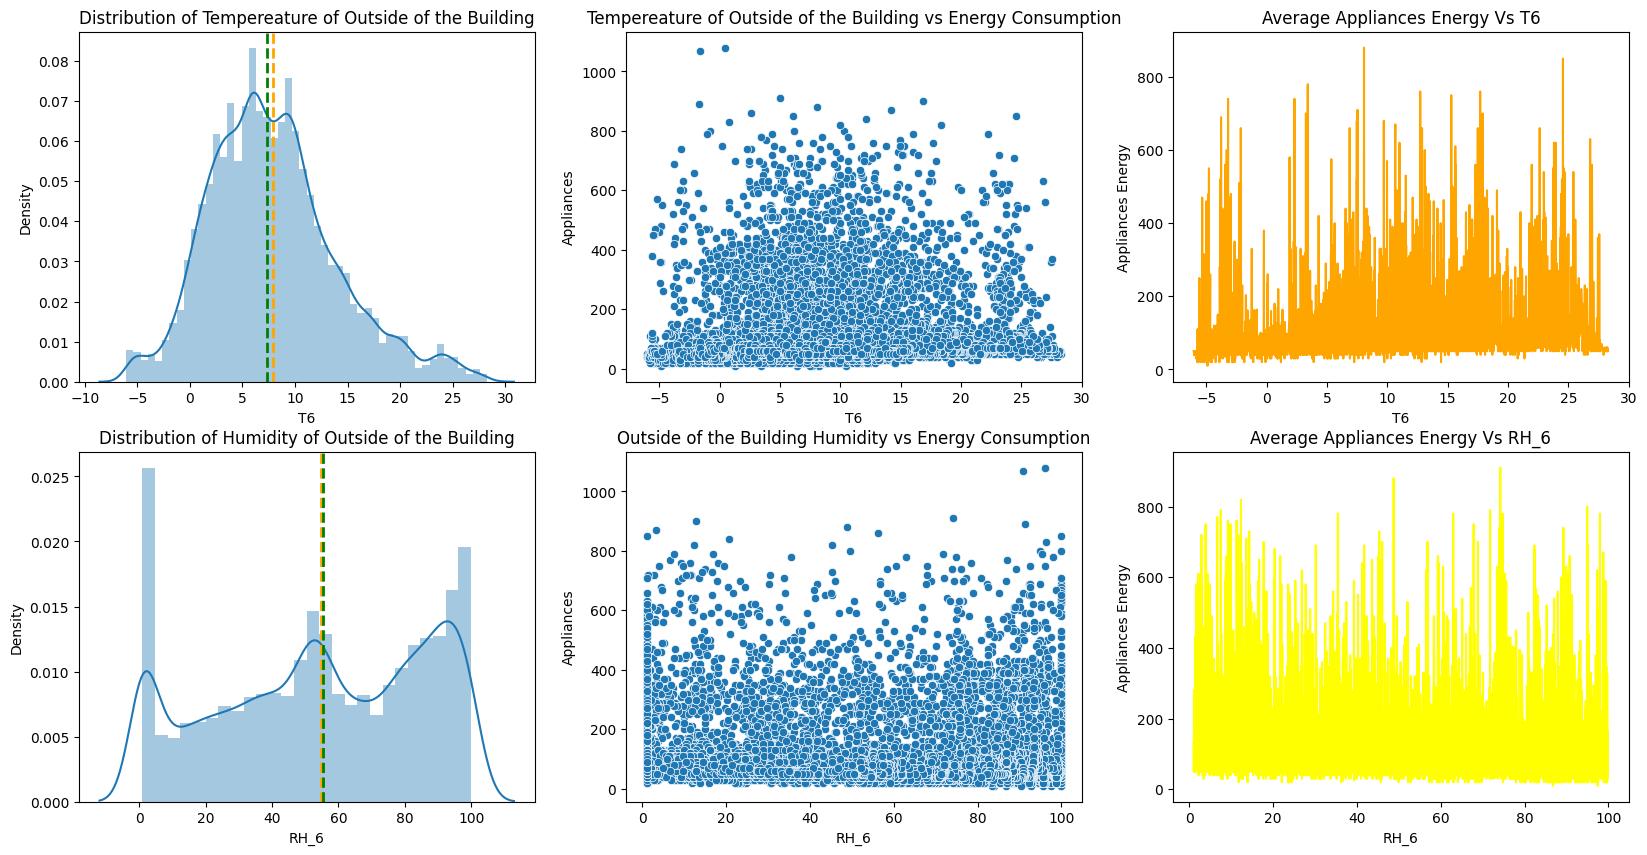

In [21]:
# Chart - 2 visualization code
fig,ax = plt.subplots(2,3, figsize=(20,10))

#Distribution of the T5
dist = sns.distplot(df_energy['T6'], ax=ax[0,0])
dist.set_title('Distribution of Tempereature of Outside of the Building', size=12)
ax[0,0].axvline(df_energy['T6'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['T6'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of T6 with Appliances
scatter=sns.scatterplot(data=df_energy,x='T6',y='Appliances',ax=ax[0,1])
scatter.set_title('Tempereature of Outside of the Building vs Energy Consumption',size=12)


#Average Appliances Energy vs T5
group_T6=df_energy.groupby(['T6'])['Appliances'].mean().reset_index()
line_T6 = sns.lineplot(data=group_T6, x='T6', y = 'Appliances',color='orange', ax= ax[0,2]);
line_T6.set(xlabel='T6', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs T6')


#Distribution of the officeromm humidty
dist = sns.distplot(df_energy['RH_6'], ax=ax[1,0])
dist.set_title('Distribution of Humidity of Outside of the Building', size=12)
ax[1,0].axvline(df_energy['RH_6'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['RH_6'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of RH4 with Appliances
scatter=sns.scatterplot(data=df_energy,x='RH_6',y='Appliances',ax=ax[1,1])
scatter.set_title('Outside of the Building Humidity vs Energy Consumption',size=12)

#Average Appliances Energy vs RH_5
group_RH6=df_energy.groupby(['RH_6'])['Appliances'].mean().reset_index()
line_RH6 = sns.lineplot(data=group_RH6, x='RH_6', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RH6.set(xlabel='RH_6', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs RH_6')


##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* Outside building temperature distribution is normally distributed, with a mean and median value around 6 and 7 degrees Celsius.

* When outside building temperature is below 5 degree,spread of energy used data is low

* the mean of the appliance energy used low between -1 to 4 and 20 to 22 degree celcius of outside building temperature

* outside building humidity data distribution is symmetrical but not not normally distributed



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when outside building temperature is between -1 to 4 and 20 to 22 degree we can save the maximum energy

#### Outside Temperature and Outside Humidity

[Text(0.5, 0, 'RH_out'),
 Text(0, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs RH_out')]

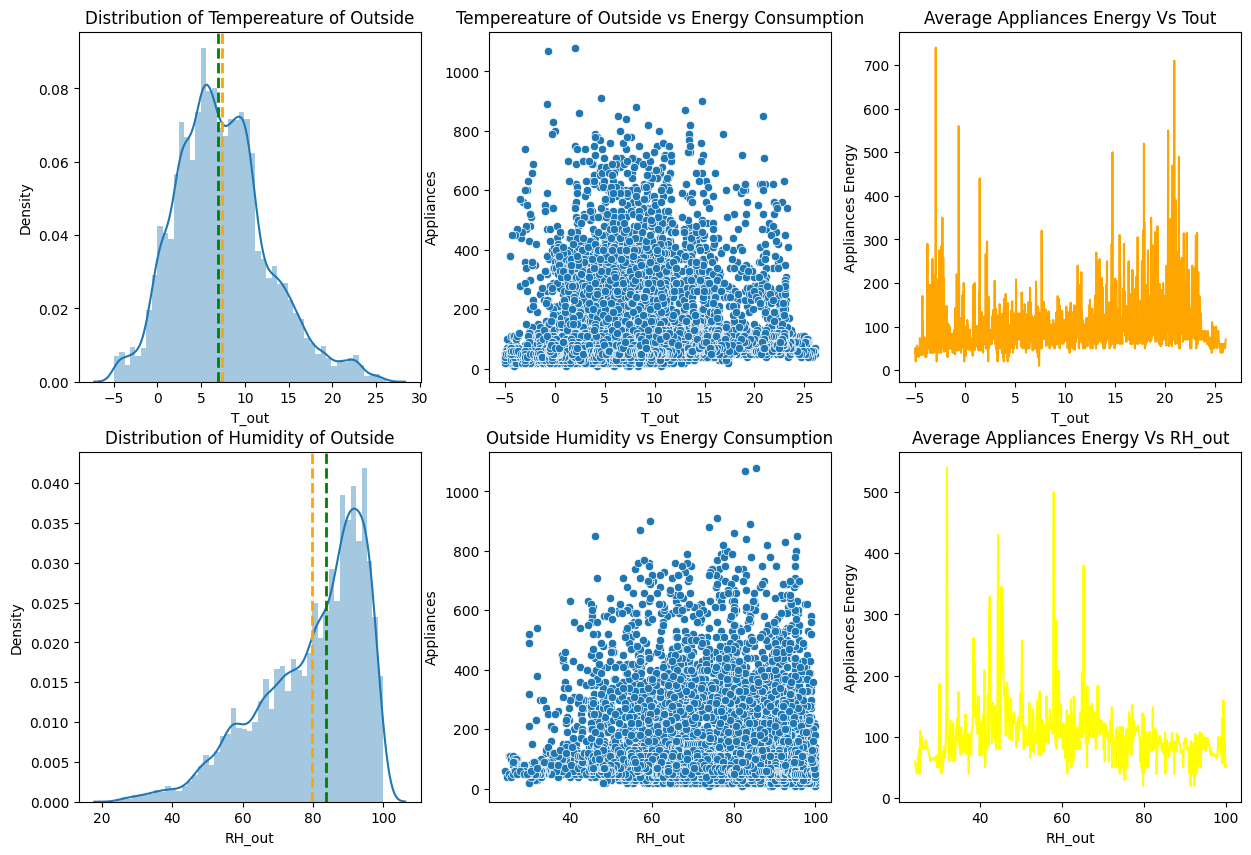

In [22]:
# Chart - 4 visualization code

fig,ax = plt.subplots(2,3, figsize=(15,10))

#Distribution of the T5
dist = sns.distplot(df_energy['T_out'], ax=ax[0,0])
dist.set_title('Distribution of Tempereature of Outside', size=12)
ax[0,0].axvline(df_energy['T_out'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['T_out'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of T5 with Appliances
scatter=sns.scatterplot(data=df_energy,x='T_out',y='Appliances',ax=ax[0,1])
scatter.set_title('Tempereature of Outside vs Energy Consumption',size=12)

#Average Appliances Energy vs T5
group_Tout=df_energy.groupby(['T_out'])['Appliances'].mean().reset_index()
line_Tout = sns.lineplot(data=group_Tout, x='T_out', y = 'Appliances',color='orange', ax= ax[0,2]);
line_Tout.set(xlabel='T_out', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs Tout')

#Distribution of the officeromm humidty
dist = sns.distplot(df_energy['RH_out'], ax=ax[1,0])
dist.set_title('Distribution of Humidity of Outside', size=12)
ax[1,0].axvline(df_energy['RH_out'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['RH_out'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of RH4 with Appliances
scatter=sns.scatterplot(data=df_energy,x='RH_out',y='Appliances',ax=ax[1,1])
scatter.set_title('Outside Humidity vs Energy Consumption',size=12)


#Average Appliances Energy vs RH_5
group_RHout=df_energy.groupby(['RH_out'])['Appliances'].mean().reset_index()
line_RHout = sns.lineplot(data=group_RHout, x='RH_out', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RHout.set(xlabel='RH_out', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs RH_out')


##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* Distribution of outside temperature is normally distributed with mean and median value around 7 degree celcius

* When outside temperature is below 0 degree the spread of the enrgy used data is low

* The mean value of energy used is exceptionally high near -3  and 22 degree celcius

*  Distribution of outside of humidity is negatively skewed.

* When outside humidity is below 40 percent,spread of the energy used data is low and it is near about gradually increase with increase the humidity

* the mean value of energy used is exceptionally high near about 30 and 60 percent of humidity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when the outside temperature is below  0 degree celcius and outside humidity is below 40 percent the chances of energy saving is high.

#### Pressure and Wind Speed

[Text(0.5, 24.0, 'Windspeed'),
 Text(857.7132352941177, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs RH_out')]

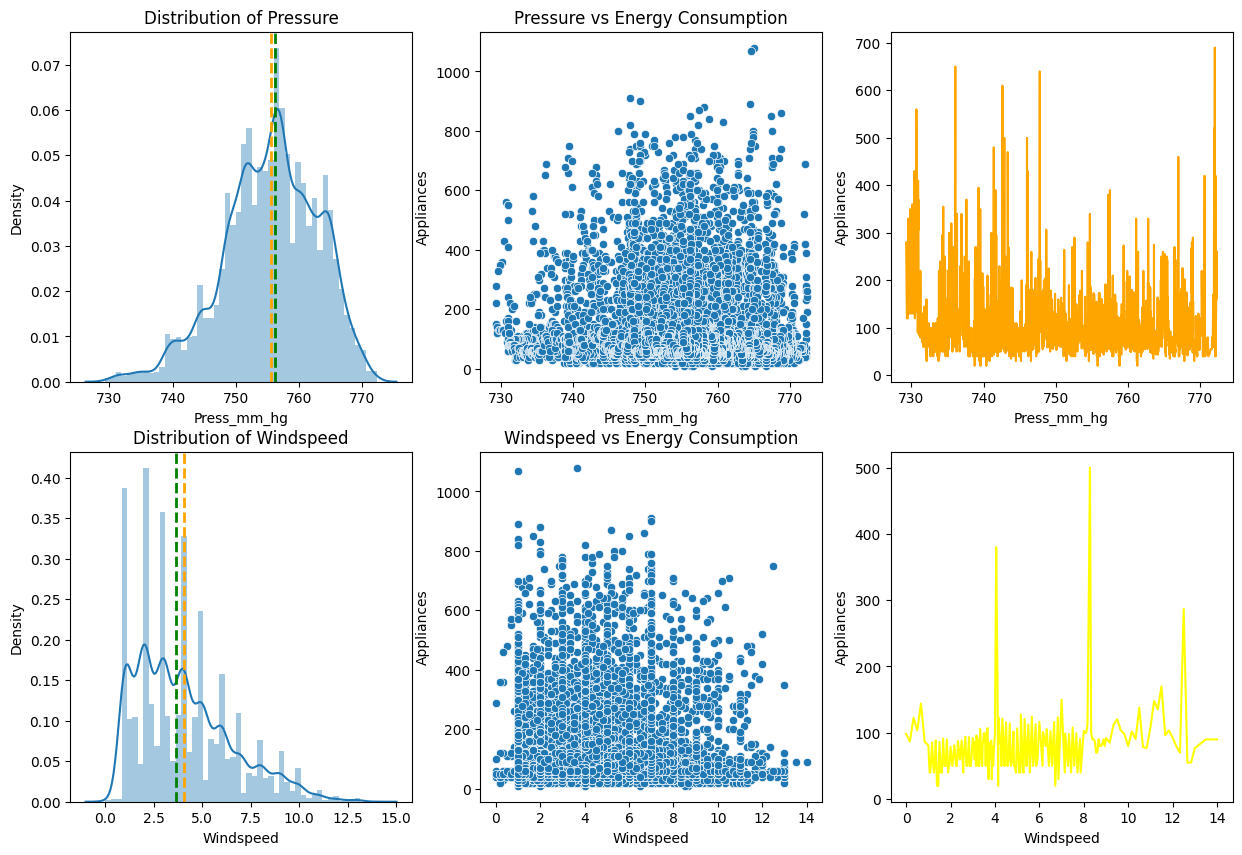

In [23]:
# Chart - 5 visualization code
fig,ax = plt.subplots(2,3, figsize=(15,10))

#Distribution of the T5
dist = sns.distplot(df_energy['Press_mm_hg'], ax=ax[0,0])
dist.set_title('Distribution of Pressure', size=12)
ax[0,0].axvline(df_energy['Press_mm_hg'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['Press_mm_hg'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of T5 with Appliances
scatter=sns.scatterplot(data=df_energy,x='Press_mm_hg',y='Appliances',ax=ax[0,1])
scatter.set_title('Pressure vs Energy Consumption',size=12)

#Average Appliances Energy vs T5
group_press=df_energy.groupby(['Press_mm_hg'])['Appliances'].mean().reset_index()
line_press = sns.lineplot(data=group_press, x='Press_mm_hg', y = 'Appliances',color='orange', ax= ax[0,2]);
line_Tout.set(xlabel='Press_mm_hg', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs Pressure')


#Distribution of the officeromm humidty
dist = sns.distplot(df_energy['Windspeed'], ax=ax[1,0])
dist.set_title('Distribution of Windspeed', size=12)
ax[1,0].axvline(df_energy['Windspeed'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['Windspeed'].median(), color='green', linestyle='dashed', linewidth=2)



#Bivariate Analysis of RH4 with Appliances
scatter=sns.scatterplot(data=df_energy,x='Windspeed',y='Appliances',ax=ax[1,1])
scatter.set_title('Windspeed vs Energy Consumption',size=12)

#Average Appliances Energy vs RH_5
group_wind=df_energy.groupby(['Windspeed'])['Appliances'].mean().reset_index()
line_wind = sns.lineplot(data=group_wind, x='Windspeed', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RHout.set(xlabel='Windspeed', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs RH_out')

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* The data distribution of pressure column is normally distributed and its mean and median value around 755

* When pressure is 745 hg,distrbution of energy consumption  low,other than it is highly spread.

* The mean value of pressure is low whean pressure is between 750 to 770 hg.

* Distribution of windspeed data has  positive skewness.

* When windspeed is below 1m/s and above 12 m/s the distribution of energy consumption is low.

* When windspeed is 4 m/s and 9 m/s the mean energy consumption is exceptionally high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When pressure and windspeed are low, there is high possibility of maximum energy saving.

#### Visibility and Dew point

[Text(0.5, 24.0, 'Tdewpoint'),
 Text(857.7132352941177, 0.5, 'Appliances Energy'),
 Text(0.5, 1.0, 'Average Appliances Energy Vs Dewpoint')]

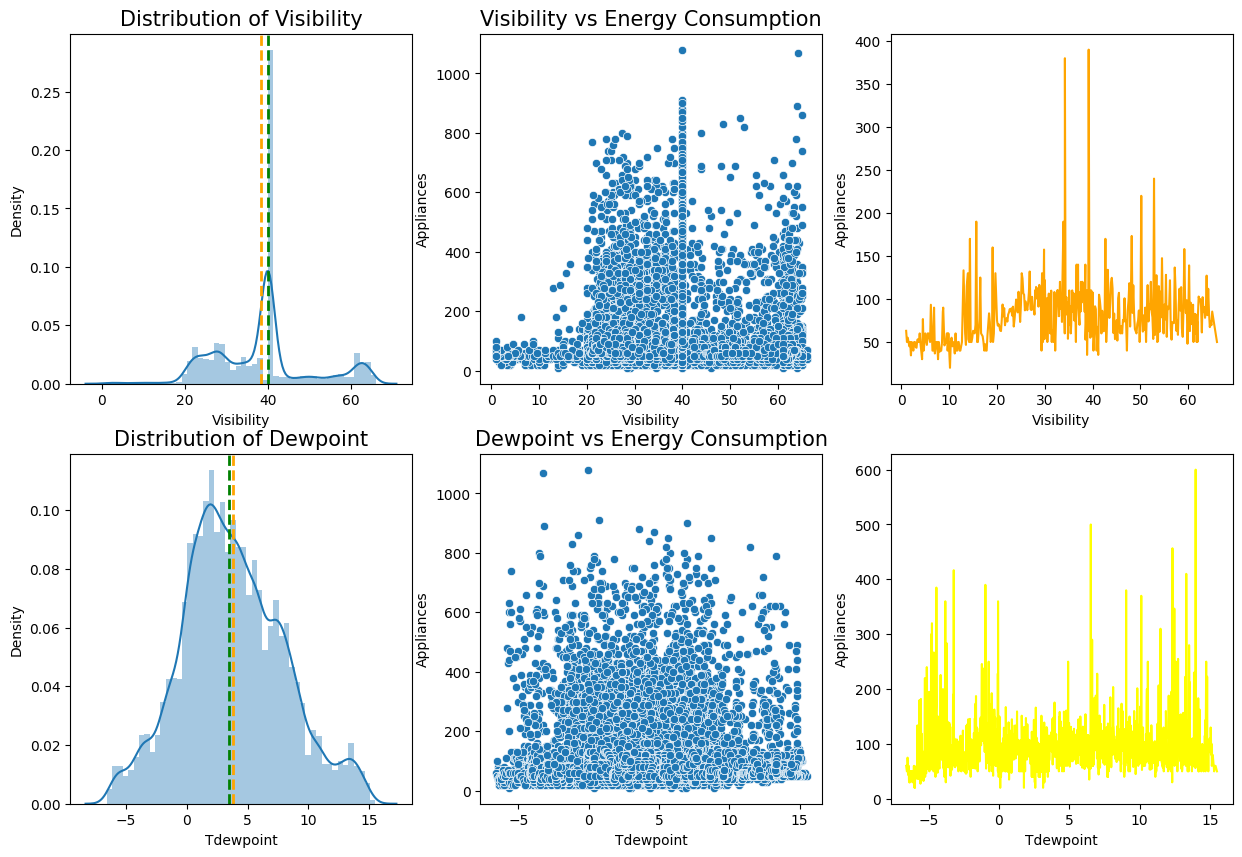

In [24]:
# Chart - 6 visualization code
fig,ax = plt.subplots(2,3, figsize=(15,10))

#Distribution of the T5
dist = sns.distplot(df_energy['Visibility'], ax=ax[0,0])
dist.set_title('Distribution of Visibility', size=15)
ax[0,0].axvline(df_energy['Visibility'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0,0].axvline(df_energy['Visibility'].median(), color='green', linestyle='dashed', linewidth=2)


#Bivariate Analysis of T5 with Appliances
scatter=sns.scatterplot(data=df_energy,x='Visibility',y='Appliances',ax=ax[0,1])
scatter.set_title('Visibility vs Energy Consumption',size=15)

#Average Appliances Energy vs T5
group_visibility=df_energy.groupby(['Visibility'])['Appliances'].mean().reset_index()
line_press = sns.lineplot(data=group_visibility, x='Visibility', y = 'Appliances',color='orange', ax= ax[0,2]);
line_Tout.set(xlabel='Visibility', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs Visibility')


#Distribution of the officeromm humidty
dist = sns.distplot(df_energy['Tdewpoint'], ax=ax[1,0])
dist.set_title('Distribution of Dewpoint', size=15)
ax[1,0].axvline(df_energy['Tdewpoint'].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[1,0].axvline(df_energy['Tdewpoint'].median(), color='green', linestyle='dashed', linewidth=2)



#Bivariate Analysis of RH4 with Appliances
scatter=sns.scatterplot(data=df_energy,x='Tdewpoint',y='Appliances',ax=ax[1,1])
scatter.set_title('Dewpoint vs Energy Consumption',size=15)

#Average Appliances Energy vs RH_5
group_dewpoint=df_energy.groupby(['Tdewpoint'])['Appliances'].mean().reset_index()
line_dewpoint=sns.lineplot(data=group_dewpoint, x='Tdewpoint', y = 'Appliances',color='yellow', ax= ax[1,2]);
line_RHout.set(xlabel='Tdewpoint', ylabel = 'Appliances Energy', title='Average Appliances Energy Vs Dewpoint')

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* Visibility has negatively skewd didtribution

* When visibility is between 20-40 and above 60 the distribution of energy consumption data is widely spread

* The mean of the energy consumption is exceptionally high when visibility is 35 and 40

* Dewpoint data is normally distributed

* When dewpoint is below 0 and above 10 the spread of the energy consuption is low

* The mean of the energy consumption is exceptionally high when dewpoint is around 7 and 12

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When visibility is below 10 and dewpoint is between 0-5 the  possibility of energy saving is high.

#### Chart - 7

In [25]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [26]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [27]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [30]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

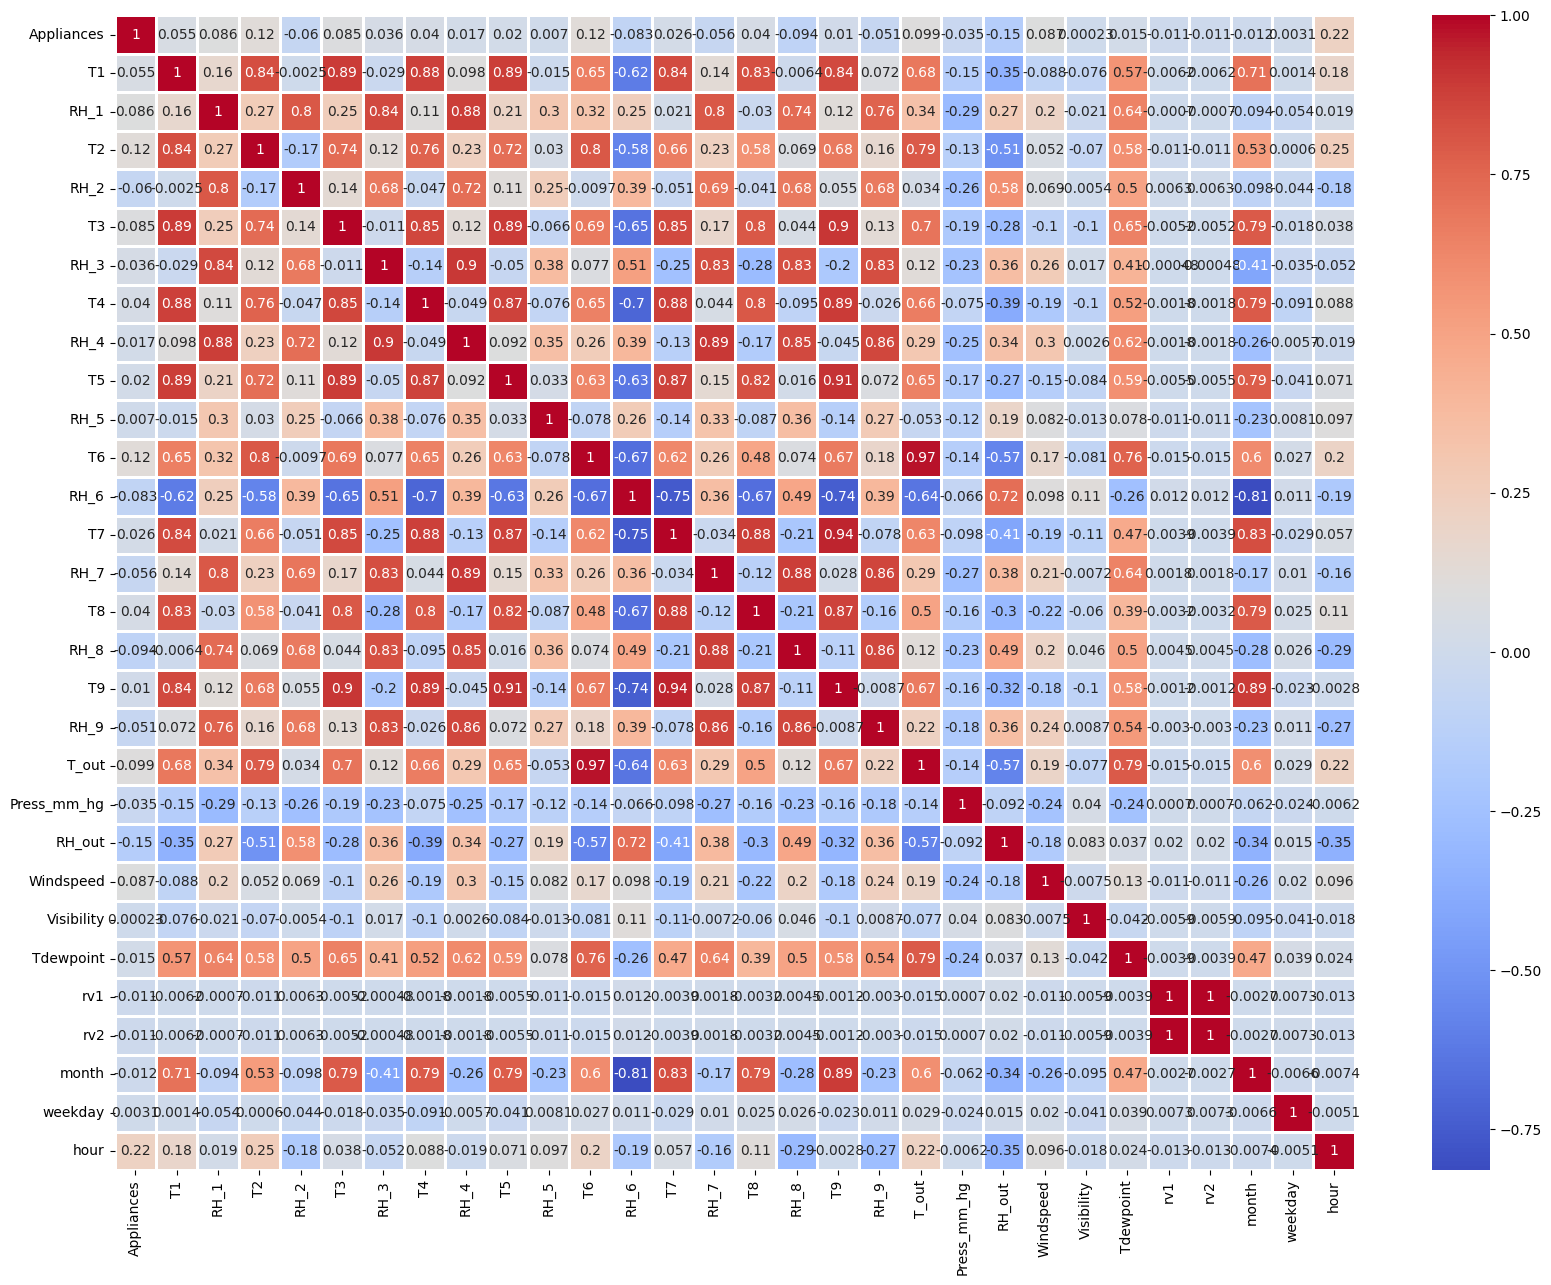

In [32]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
correlation = df_energy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',linewidth=0.8)
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

* Heatmaps provide a quick overview of critical web performance factors.

* Heatmaps are a visual way to understand numerical features.

* Heatmaps assist businesses in making informed decisions that benefit the bottom line.

* It also aids in comprehending multicollinearity, which allows us to determine which features to keep and which to eliminate or combine.


##### 2. What is/are the insight(s) found from the chart?

* Temprature columns : It is clear from the heatmap that four columns have a high degree of correlation with T9 that are T3,T5,T7,T8 also T6 & T_Out has high correlation. Hence T6 & T9 is to be removed from training set as information provided by them can be provided by other features.
* Humidity columns : For each and every humidity columns i.e RH_1 to RH_9 we see moderate correlation which is workable.
* Weather_columns: Visibility, Tdewpoint, Press_mm_hg have low correlation values
* Random variables column : Similar to the trend that we have seen in the weather columns we have low correlations

#### Chart - 15 - Pair Plot

<Figure size 2500x2500 with 0 Axes>

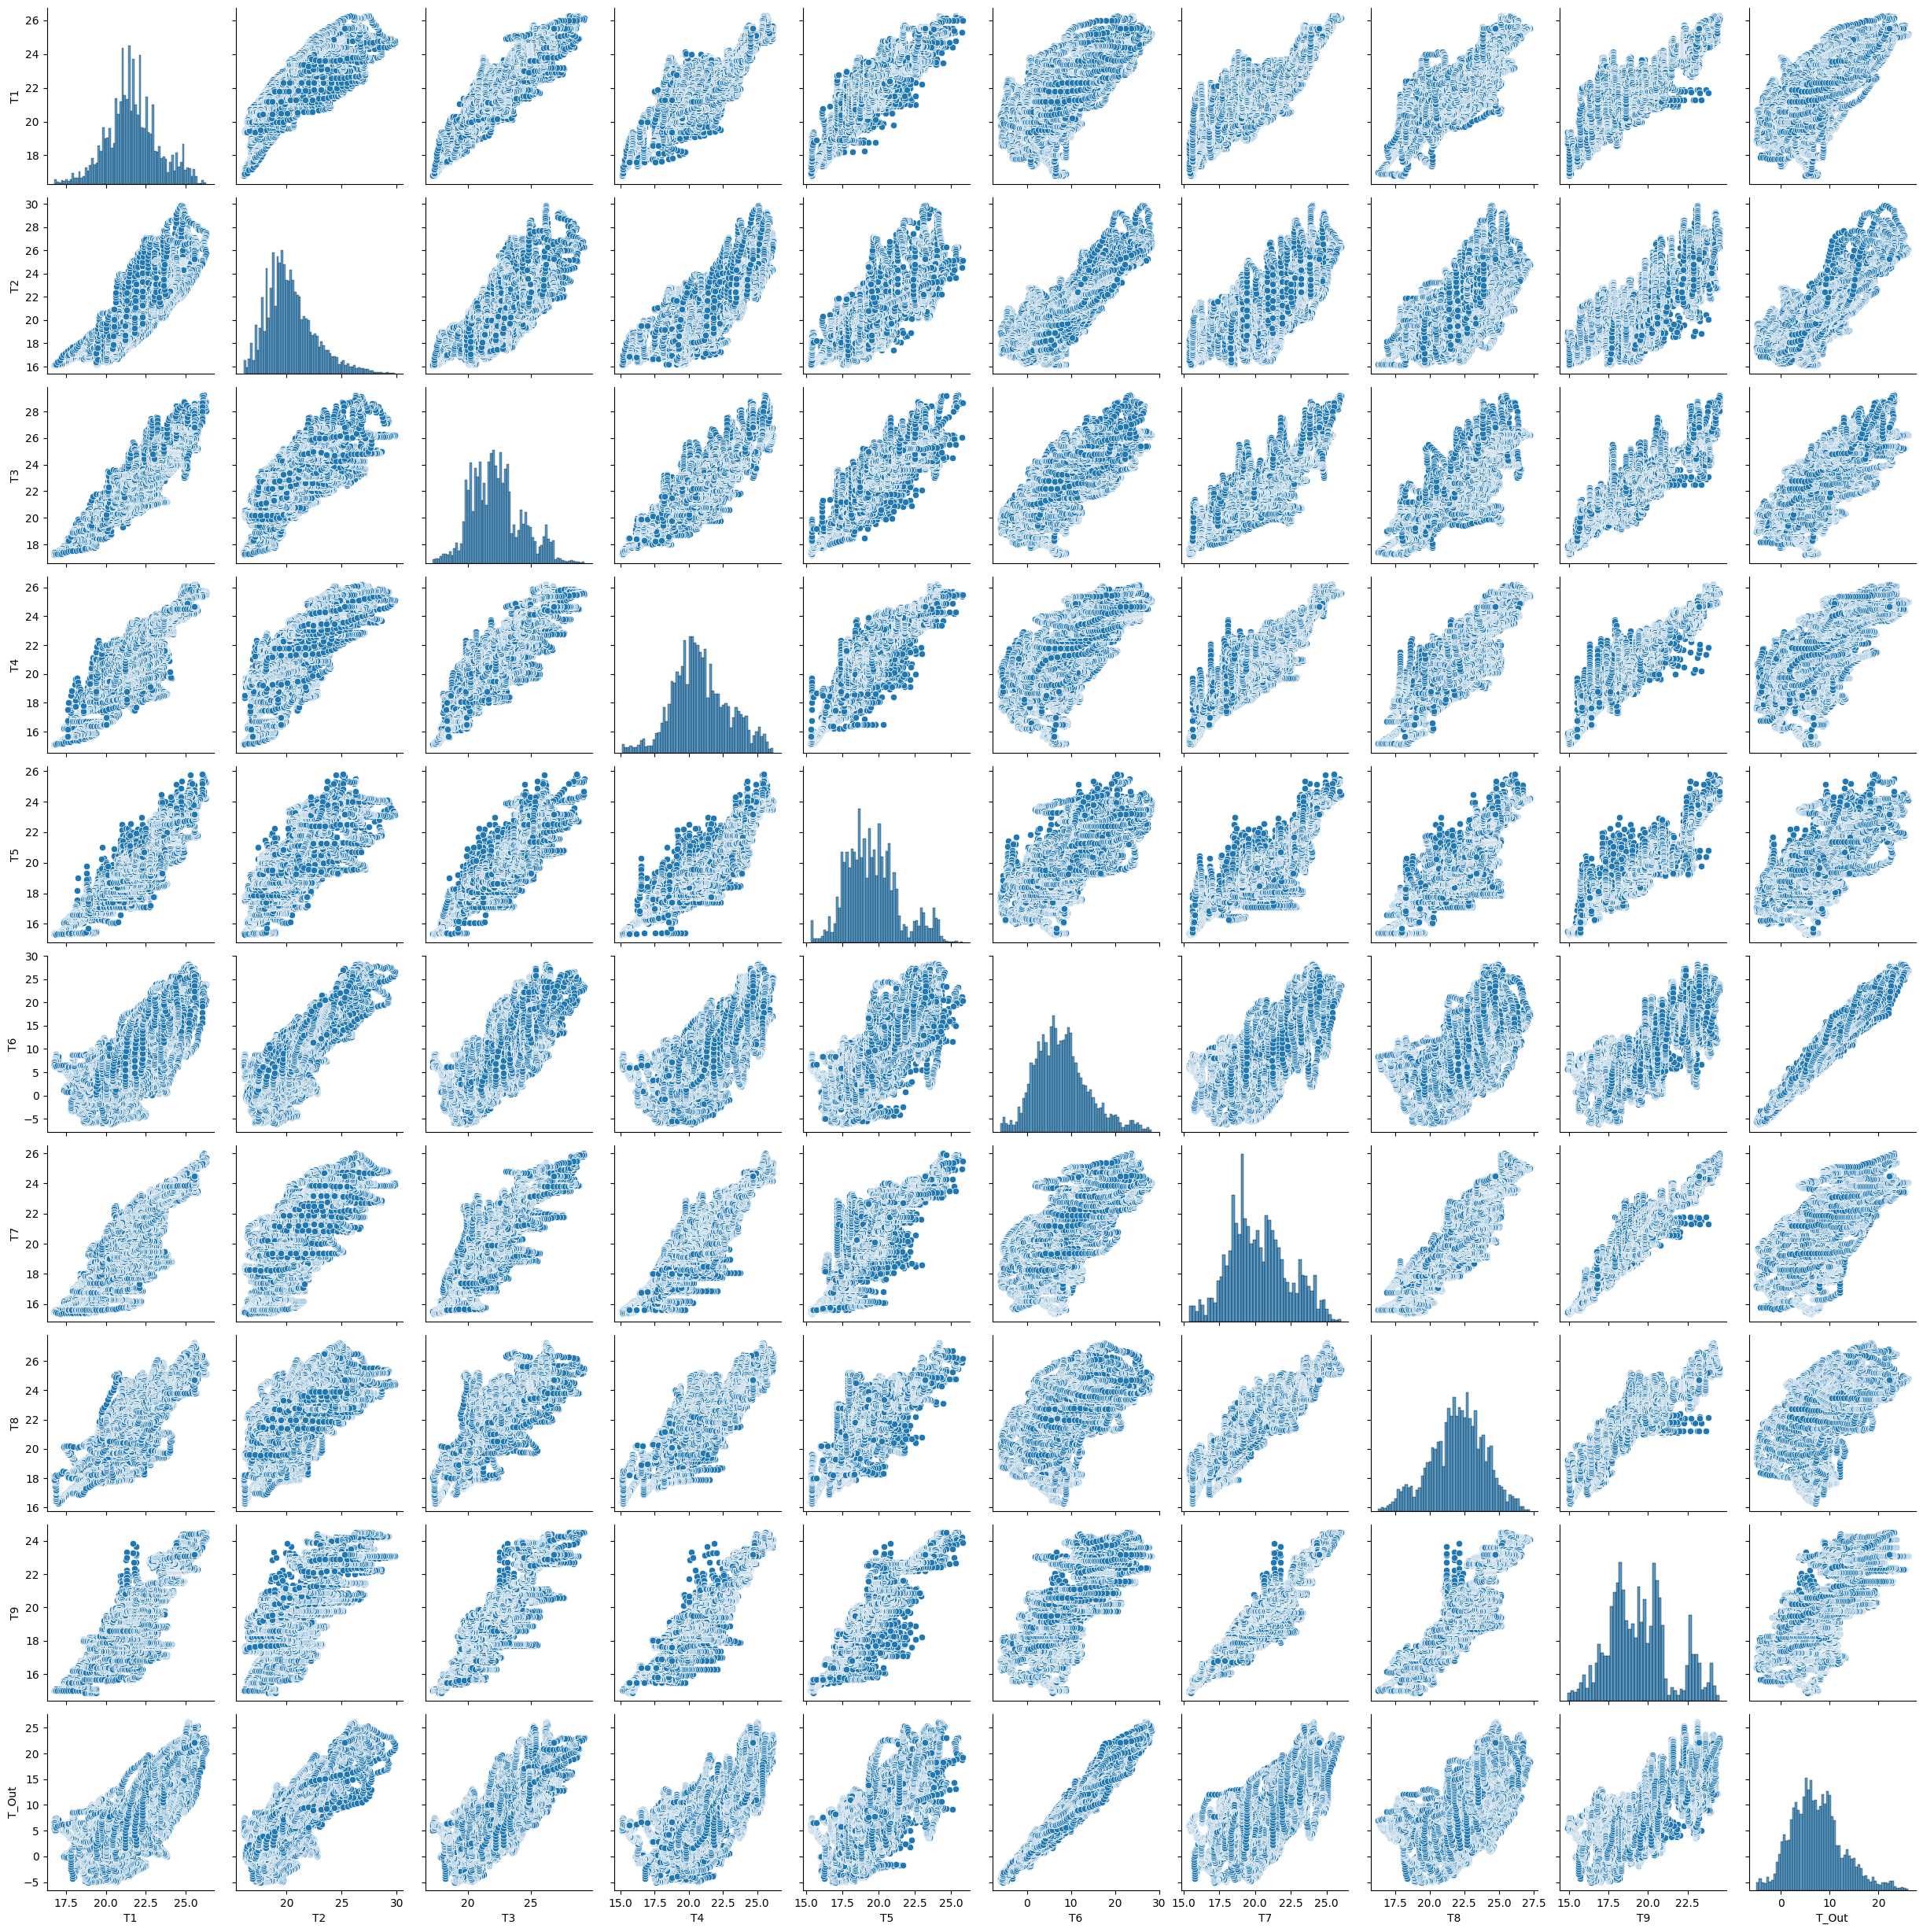

In [33]:
# Pair Plot visualization code
T1=df_energy['T1']
T2=df_energy['T2']
T3=df_energy['T3']
T4=df_energy['T4']
T5=df_energy['T5']
T6=df_energy['T6']
T7=df_energy['T7']
T8=df_energy['T8']
T9=df_energy['T9']
T_Out=df_energy['T_out']
energy=df_energy['Appliances']
plt.figure(figsize=(25,25))
pair=sns.pairplot(pd.DataFrame(list(zip(T1,T2,T3,T4,T5,T6,T7,T8,T9,T_Out)),columns=['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_Out']))
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a data visualisation that plots pair-wise relationships between all the variables in a dataset. This helps to better understand the relationships visually.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature has linear relationship with each other
* T9 with T3,T5,T7,T8 has strong linear relationship and T6 with T_out has strong linear relationship

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no change in average energy consumption bet weekdays and weekend

**Alternate** :- There is higher average energy consumption on weekends as compared to weekdays.

In [62]:
week_energy=df_energy.groupby(['weekday'])['Appliances'].mean()
week_energy


weekday
0    111.450684
1     87.125000
2     89.930556
3     90.434028
4    104.622144
5    106.246345
6     94.915936
Name: Appliances, dtype: float64

In [64]:
week_energy[6:]

weekday
6    94.915936
Name: Appliances, dtype: float64

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
week_energy=df_energy.groupby(['weekday'])['Appliances'].sum()
data_weekday = df_energy[df_energy['dayofweek'] <= 5][['Total_consumption']]
data_weekend = df_energy[df_energy['dayofweek'] > 5][['Total_consumption']]

#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
#find missing values
df_energy.isnull().sum()

date           0
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
month          0
weekday        0
hour           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null values in this Dataset.As a result, no imputation is required.

### 2. Handling Outliers

In [38]:
#copy the dataframe
df=df_energy.copy()

In [39]:
col_list=list(df.describe().columns)
col_list

['Appliances',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'month',
 'weekday',
 'hour']

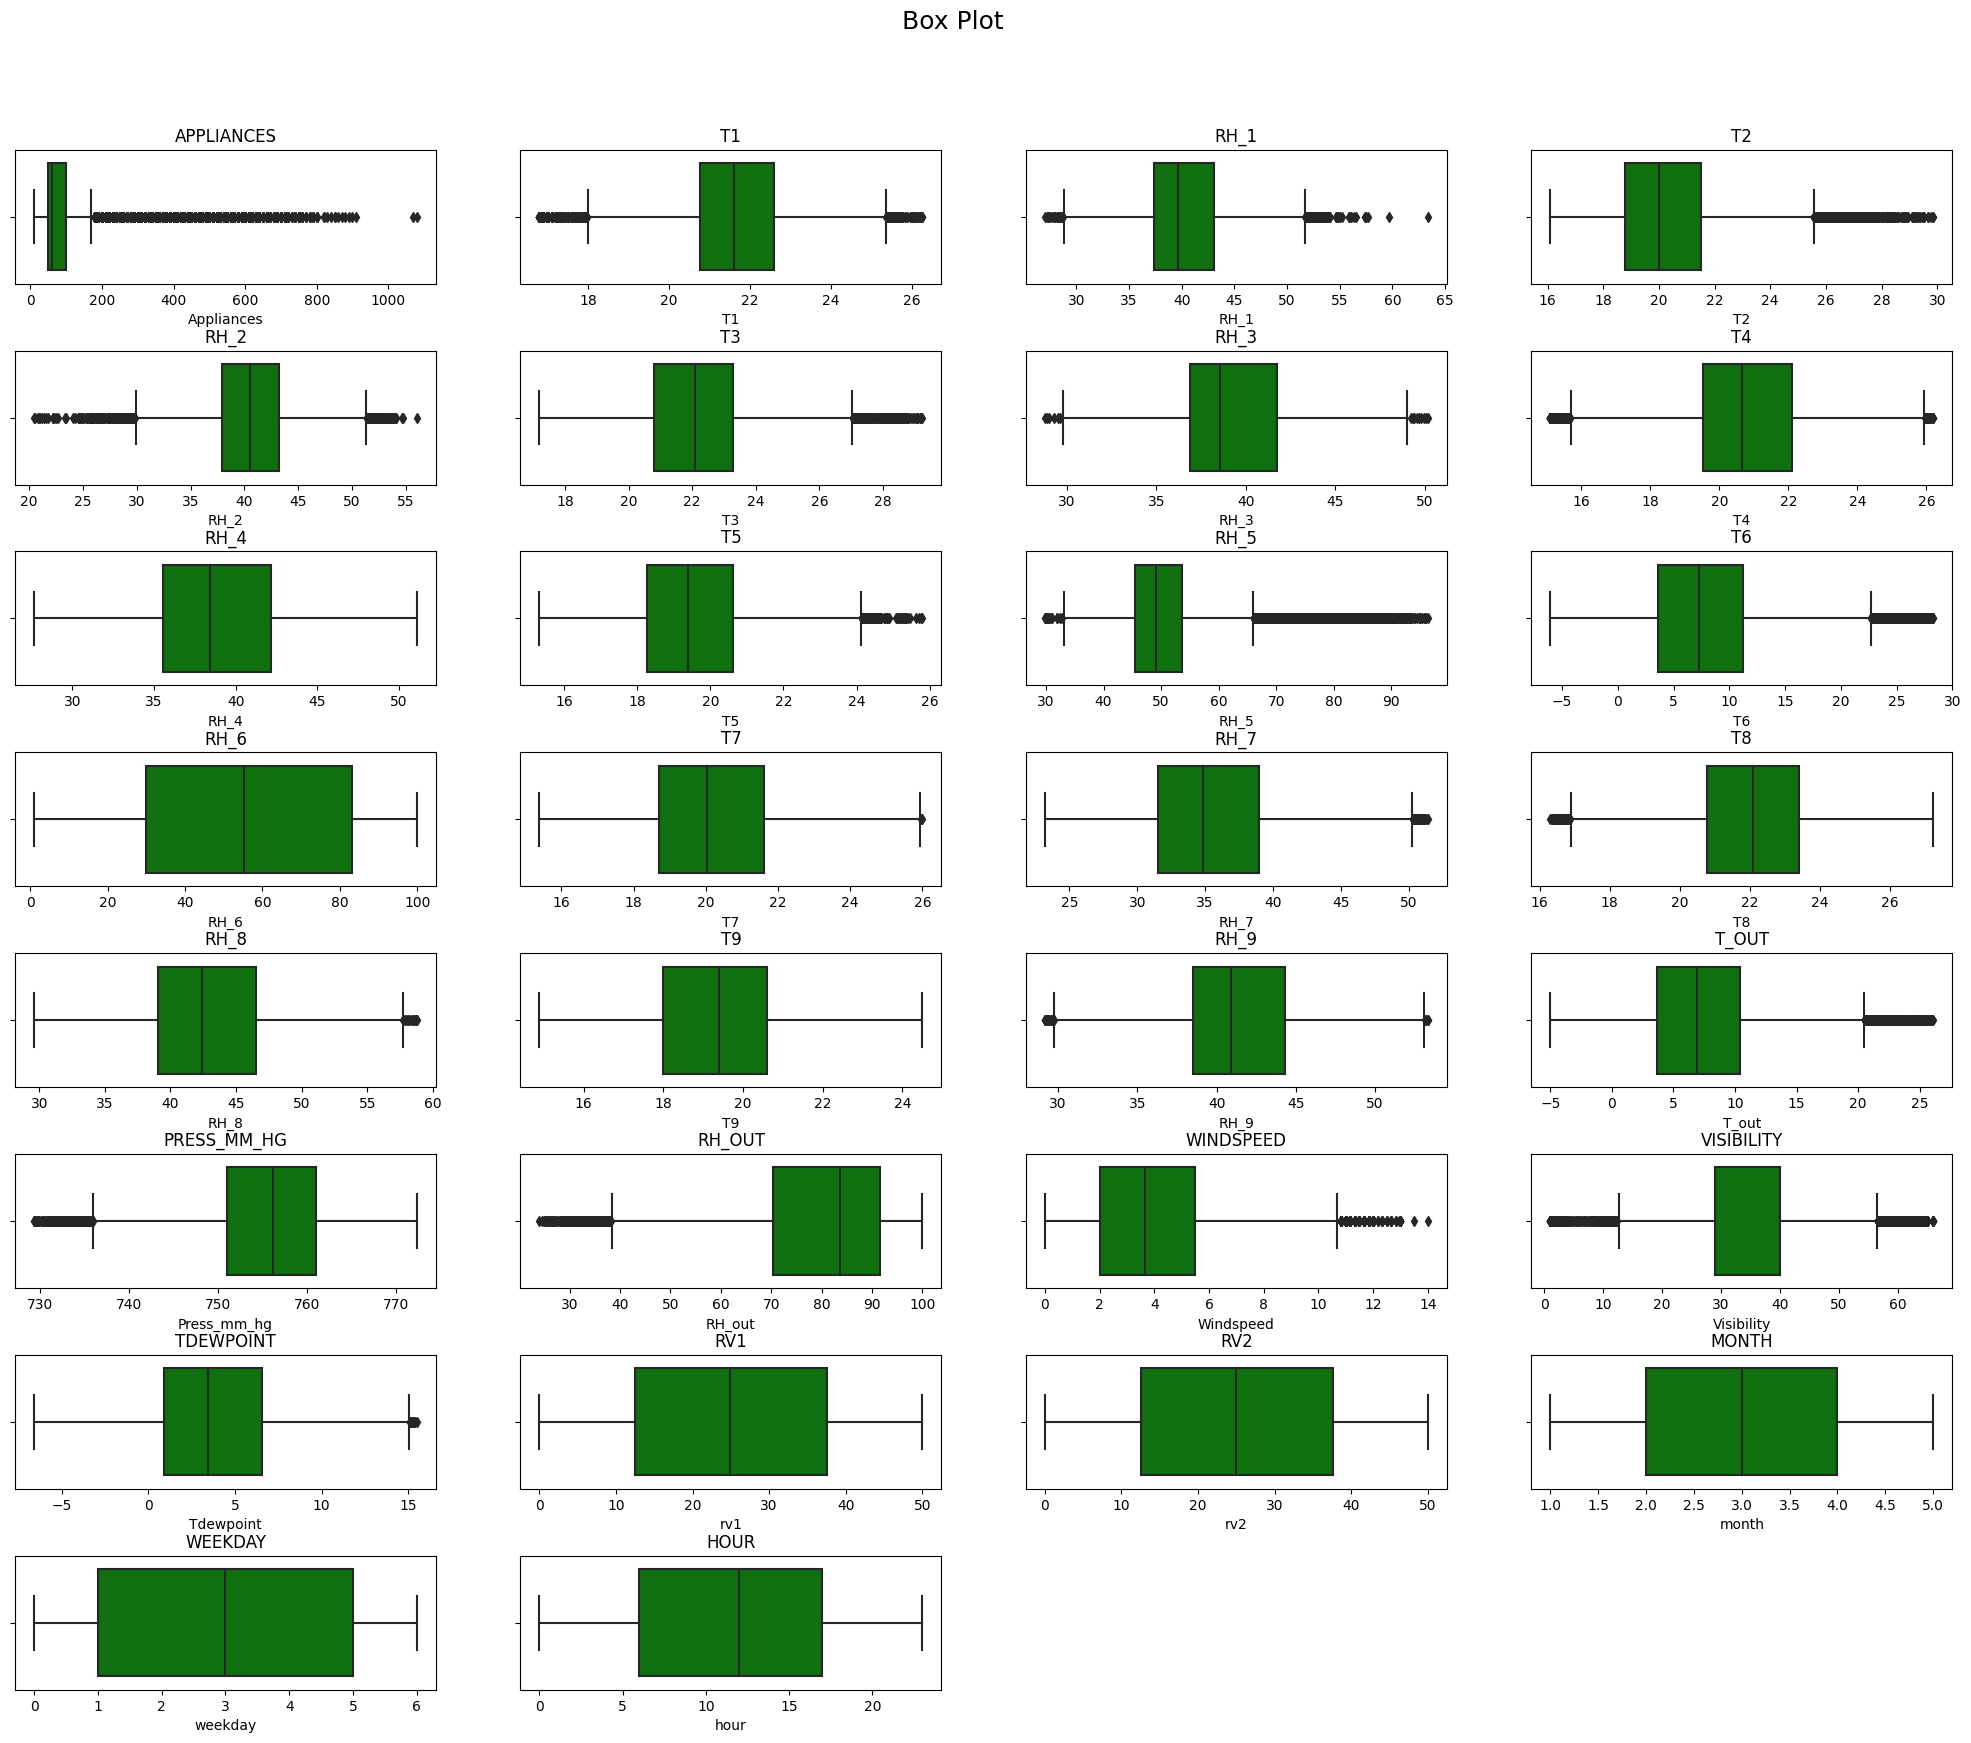

In [40]:
#find the columns have outlier with boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

**The majority of appliances use between 0 and 200 Wh of energy. It is apparent that many variables contain outliers.**

**Outliers can be found in T1, T2, T3, T4, T5, T6, T7, T8, and T_OUT.**

**Outliers exist in RH_1, RH_2, RH_3, RH_5, RH_7, RH_8, RH_9, and RH_OUT. Windspeed, Tdewpoint, Visibility, and the variable of interest Outliers exist in appliances as well.**

In [41]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Appliances 

Percentiles: 25th=50.000, 75th=100.000, IQR=50.000

lower = -25.0 and upper = 175.0 
 
Identified outliers: 2138
Appliances Outliers Removed

-------

T1 

Percentiles: 25th=20.760, 75th=22.600, IQR=1.840

lower = 18.0 and upper = 25.36 
 
Identified outliers: 515
T1 Outliers Removed

-------

RH_1 

Percentiles: 25th=37.333, 75th=43.067, IQR=5.733

lower = 28.733333333333185 and upper = 51.666666666666806 
 
Identified outliers: 146
RH_1 Outliers Removed

-------

T2 

Percentiles: 25th=18.790, 75th=21.500, IQR=2.710

lower = 14.724999999999998 and upper = 25.565 
 
Identified outliers: 546
T2 Outliers Removed

-------

RH_2 

Percentiles: 25th=37.900, 75th=43.260, IQR=5.360

lower = 29.86 and upper = 51.3 
 
Identified outliers: 235
RH_2 Outliers Removed

-------

T3 

Percentiles: 25th=20.790, 75th=23.290, IQR=2.500

lower = 17.04 and upper = 27.04 
 
Identified outliers: 217
T3 Outliers Removed

-------

RH_3 

Percentiles: 25th=36.900, 75th=41.760, IQR=4.860

lower = 

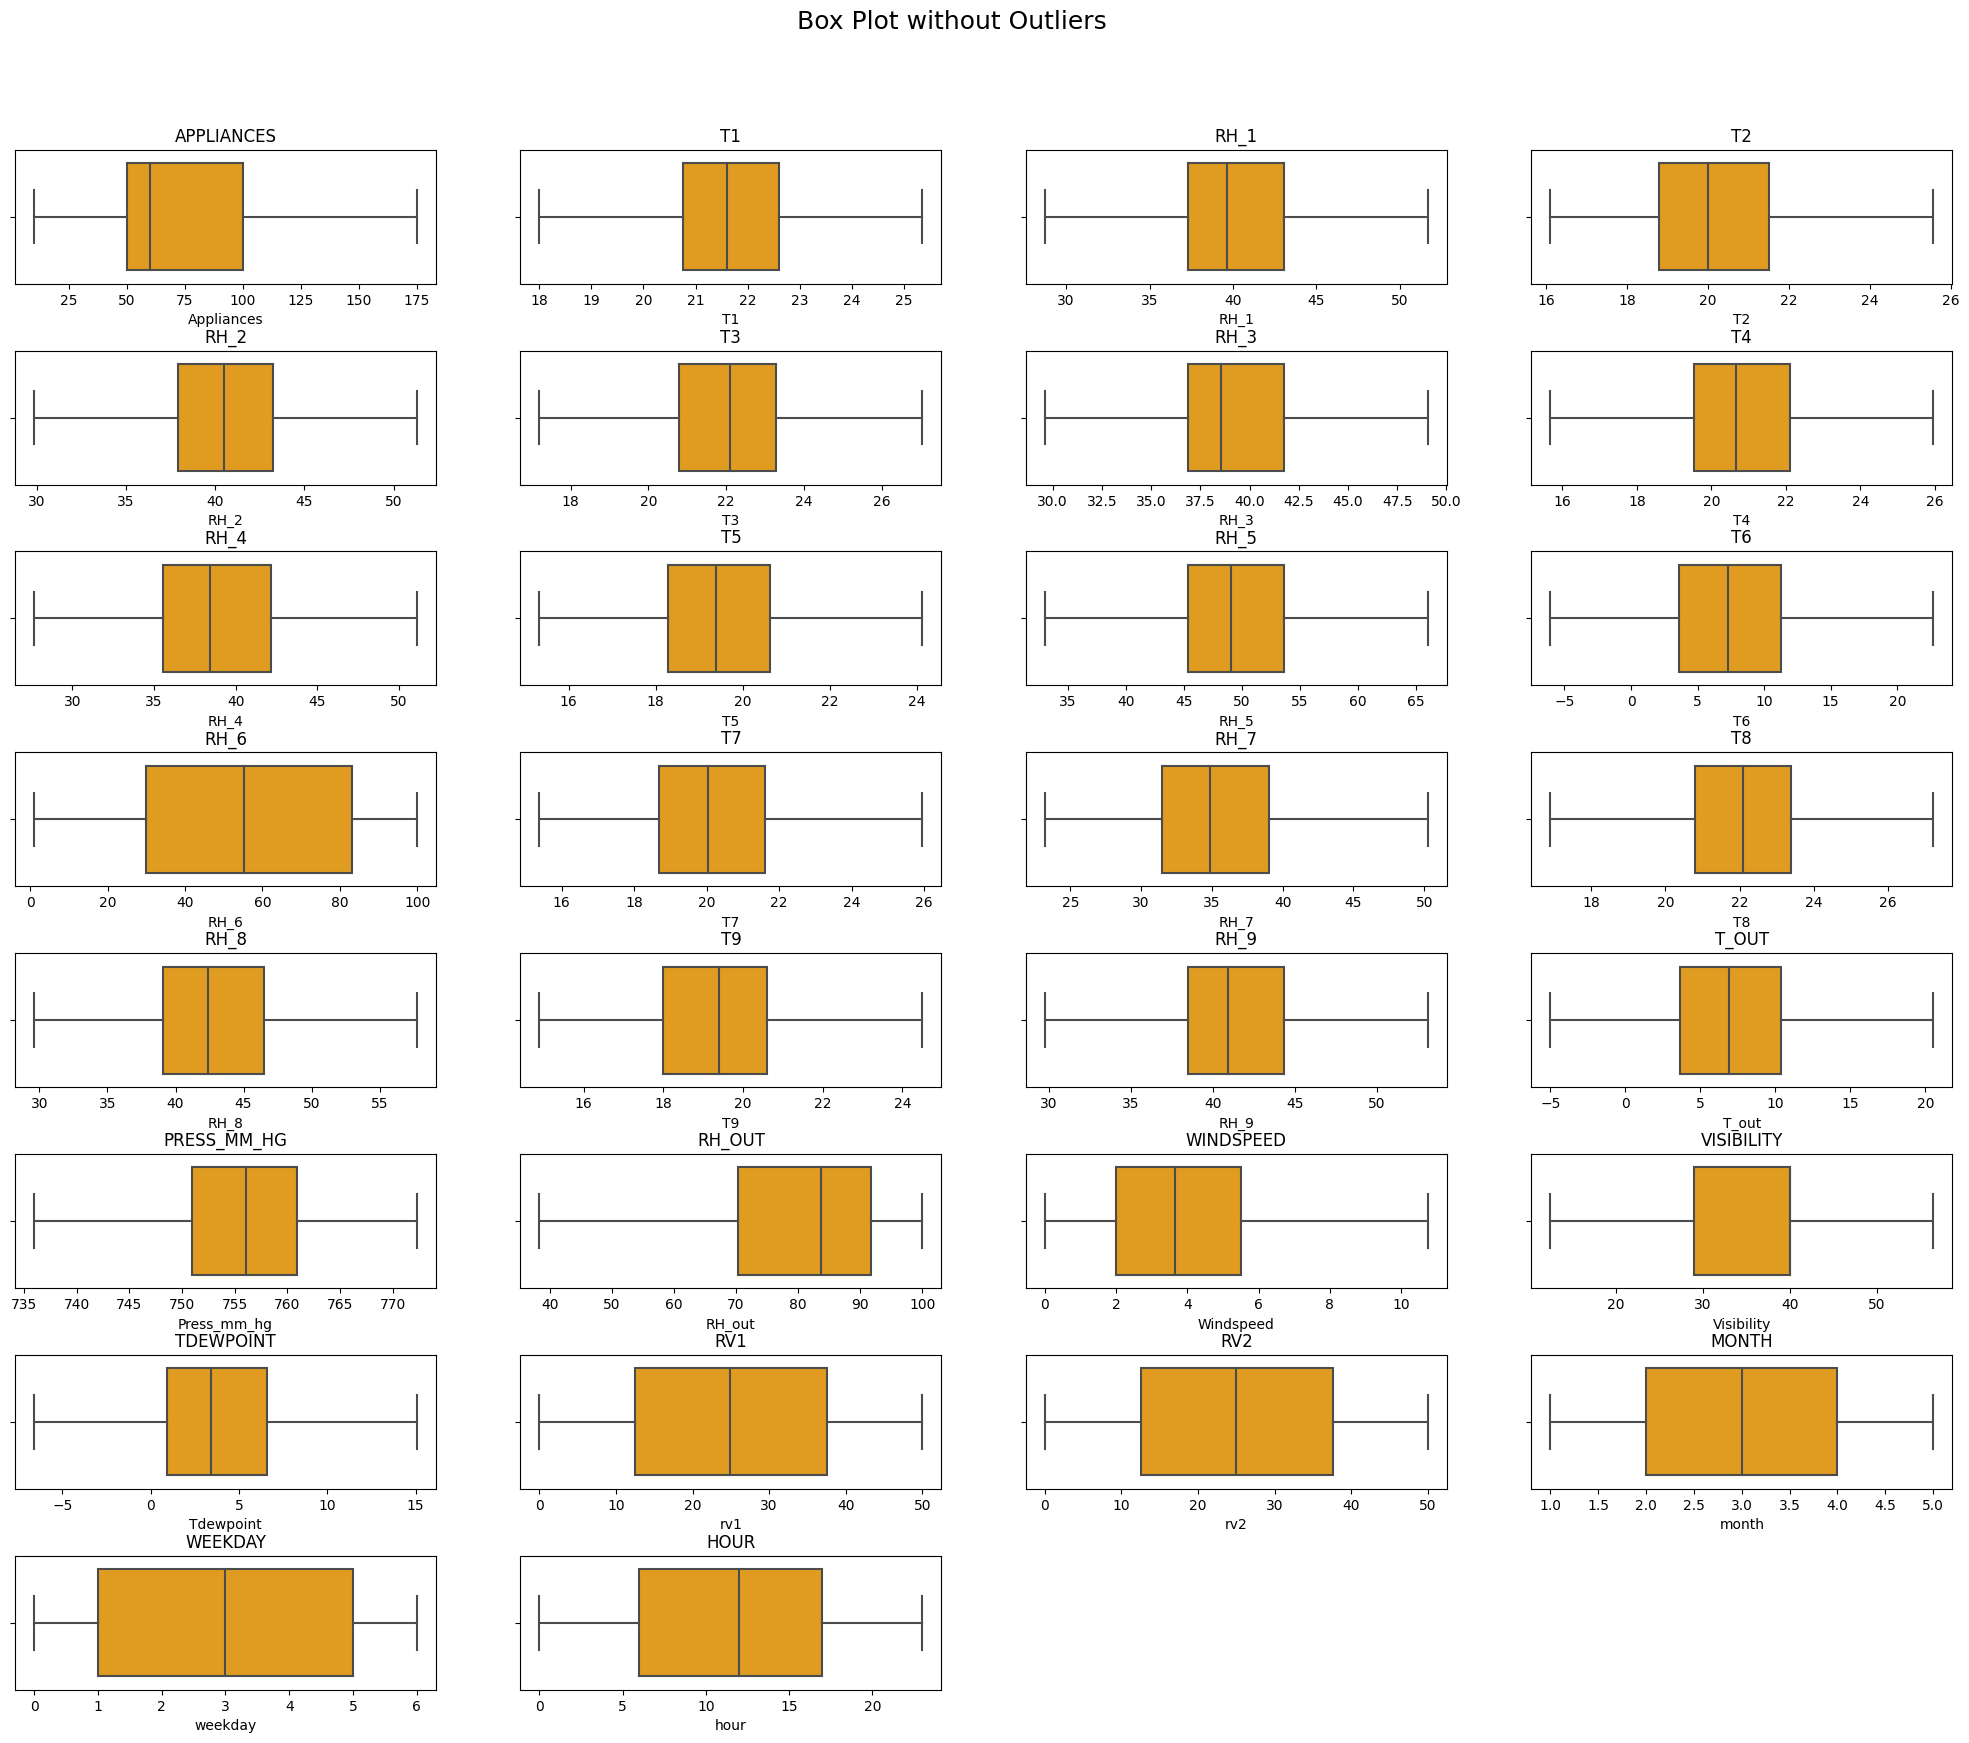

In [42]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='orange' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot is a handy graphical depiction for describing the behaviour of data in the middle and at the ends of distributions. The box plot employs the median as well as the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, the difference (Q3 — Q1) is known as the interquartile range, or IQ. A box plot is made by drawing a box between the higher and lower quartiles and a solid line across the box to find the median. The following quantities (referred to as fences) are required for recognising extreme values in the distribution's tails:

lower fence: Q1–1.5*IQ

upper fence: Q3 + 1.5*IQ

### 3. Categorical Encoding

In [43]:
df.T1.dtype

dtype('float64')

In [44]:
#find the categorical column
#cat_feature=[col for col in list(df.columns) if df[col].dtype==object ]
#cat_feature

In [45]:
# Encode your categorical columns
#for col in cat_feature:

  #one_hot = pd.get_dummies(df[col],prefix = col, prefix_sep='_')
  #df.drop(col, inplace = True, axis=1)
  #df = df.join(one_hot)
#df.info()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Dummy Encoding technique for month and weekdays. This categorical data encoding approach converts the categorical variable into a group of binary variables (also known as dummy variables). For N categories in a variable, one-hot encoding employs N binary variables. Dummy encoding is a minor improvement over one-hot encoding. Dummy encoding employs N-1 features to represent N labels/categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part**

#### 1. Expand Contraction

In [46]:
# Expand Contraction

#### 2. Lower Casing

In [47]:
# Lower Casing

#### 3. Removing Punctuations

In [48]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Remove Stopwords

In [51]:
# Remove White spaces

#### 6. Rephrase Text

In [52]:
# Rephrase Text

#### 7. Tokenization

In [53]:
# Tokenization

#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [55]:
# POS Taging

#### 10. Text Vectorization

In [56]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [57]:
#Manipulate Features to minimize feature correlation
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [58]:
#check multicolinearuty
calc_vif(df[[i for i in col_list if i not in ['Appliances','T6','T9']]]).sort_values(by='VIF',ascending=False)

variables      VIF
23          rv2      inf
22          rv1      inf
0            T1  3409.16
17  Press_mm_hg  2104.88
2            T2  2013.22
3          RH_2  1670.03
5          RH_3  1570.63
1          RH_1  1554.91
7          RH_4  1429.12
18       RH_out  1269.19
4            T3  1255.23
11           T7  1159.12
8            T5  1049.27
13           T8   990.49
6            T4   954.01
15         RH_9   686.34
14         RH_8   623.11
12         RH_7   501.30
16        T_out   310.82
21    Tdewpoint   130.77
9          RH_5    80.08
24        month    72.00
10         RH_6    43.28
20   Visibility    14.70
26         hour     7.50
19    Windspeed     5.40
25      weekday     3.57

Let's remove on random variable and check again

In [59]:
calc_vif(df[[i for i in col_list if i not in ['Appliances','T6','T9','rv2']]]).sort_values(by='VIF',ascending=False)

variables      VIF
0            T1  3409.16
17  Press_mm_hg  2104.88
2            T2  2013.22
3          RH_2  1670.03
5          RH_3  1570.63
1          RH_1  1554.91
7          RH_4  1429.12
18       RH_out  1269.19
4            T3  1255.23
11           T7  1159.12
8            T5  1049.27
13           T8   990.49
6            T4   954.01
15         RH_9   686.34
14         RH_8   623.11
12         RH_7   501.30
16        T_out   310.82
21    Tdewpoint   130.77
9          RH_5    80.08
23        month    72.00
10         RH_6    43.28
20   Visibility    14.70
25         hour     7.50
19    Windspeed     5.40
22          rv1     3.98
24      weekday     3.57

In [60]:
# create new features
# create a column average building temperature based on all temperature
df['Average_building_Temperature']=df[['T1','T2','T3','T4','T5','T7','T8']].mean(axis=1)
df['Temperature_difference']=abs(df['Average_building_Temperature']-df['T_out'])
#df['Average_building_Temperature']=df['Average_building_Temperature'].apply(lambda x: format(x,'.2f'))
#create a column average building humidity
df['Average_building_humidity']=df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']].mean(axis=1)
df['Humidity_difference']=abs(df['RH_out']-df['Average_building_humidity'])
#create a column rv_mean
#df['rv_mean']=round(((df.rv1+df.rv2)/2),2)

Let's remove T1,T2,T9,Press_mm_hg and check again.

In [61]:
#numerical feature list for checking multicolinearity
new_feat=['Temperature_difference','Humidity_difference']

for i in new_feat:
    col_list.append(i)

In [62]:
#check multicolinearuty
calc_vif(df[[i for i in col_list if i not in ['Appliances','T6','T9','rv2','T1','T2','T3','T4','T5','T7','T8','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','Press_mm_hg','Visibility','RH_out','T_out','Temperature_difference']]]).sort_values(by='VIF',ascending=False)

variables   VIF
3                month  6.54
6  Humidity_difference  6.00
2                  rv1  3.76
5                 hour  3.39
0            Windspeed  3.33
4              weekday  3.14
1            Tdewpoint  2.43

Now remove RH_3,RH_4,T7,RH_1 and check again

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting
df_removed=df[[i for i in col_list if i not in ['T6','T9','rv2','T1','T2','T3','T4','T5','T7','T8','RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','Press_mm_hg','Visibility','RH_out','T_out','Temperature_difference']]]

df_removed.head()

Appliances  Windspeed  Tdewpoint        rv1  month  weekday  hour  \
0        60.0   7.000000        5.3  13.275433      1        0    17   
1        60.0   6.666667        5.2  18.606195      1        0    17   
2        50.0   6.333333        5.1  28.642668      1        0    17   
3        50.0   6.000000        5.0  45.410389      1        0    17   
4        60.0   5.666667        4.9  10.084097      1        0    17   

   Humidity_difference  
0            41.089259  
1            41.172778  
2            41.371111  
3            41.425185  
4            41.267037

##### What all feature selection methods have you used  and why?

I use Variance Inflation Factor(VIF) for feature selection.

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

##### Which all features you found important and why?

In a multivariate regression model, multicollinearity exists when there is a correlation between many independent variables. Under ideal conditions, small VIF values, such as VIF< 3, suggest low correlation across variables. The VIF cutoff value is set to 5 by default; only variables having a VIF less than 5 will be included in the model. However, several authorities suggest that a VIF of less than 10 is appropriate.

According to above stated criteria, T_out, windspeed, Visibility, Tdewpoint, hour are important features for this regression probelm.

### 5. Data Transformation

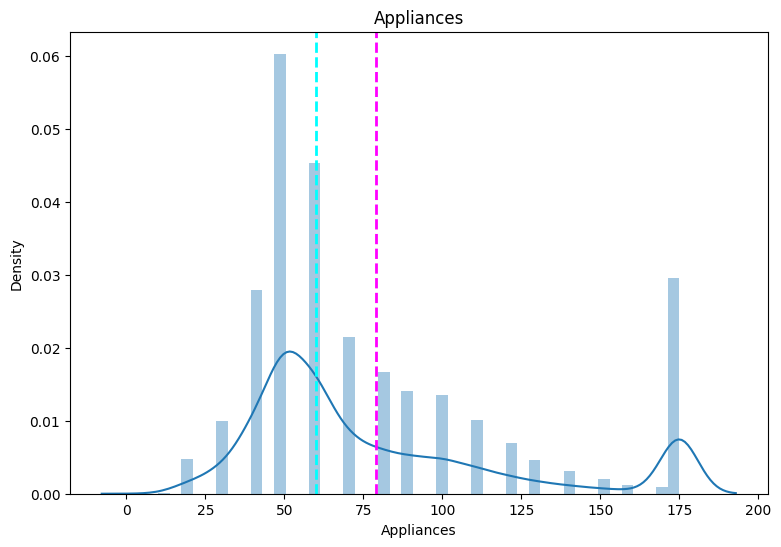

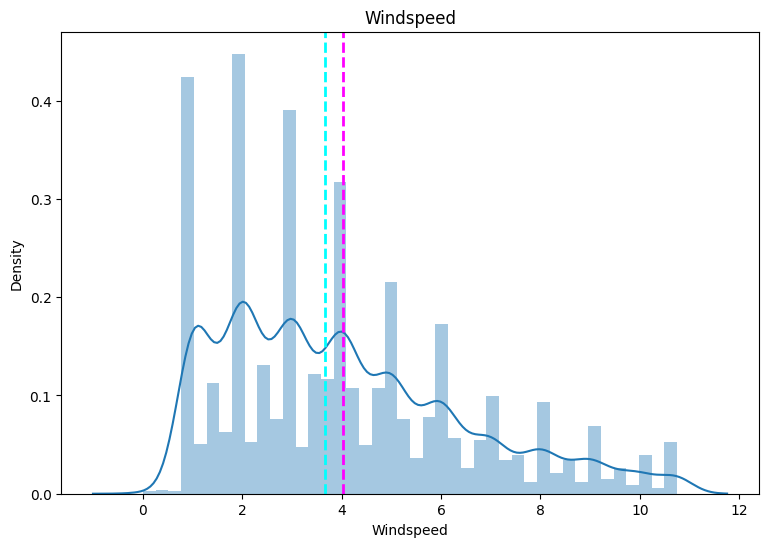

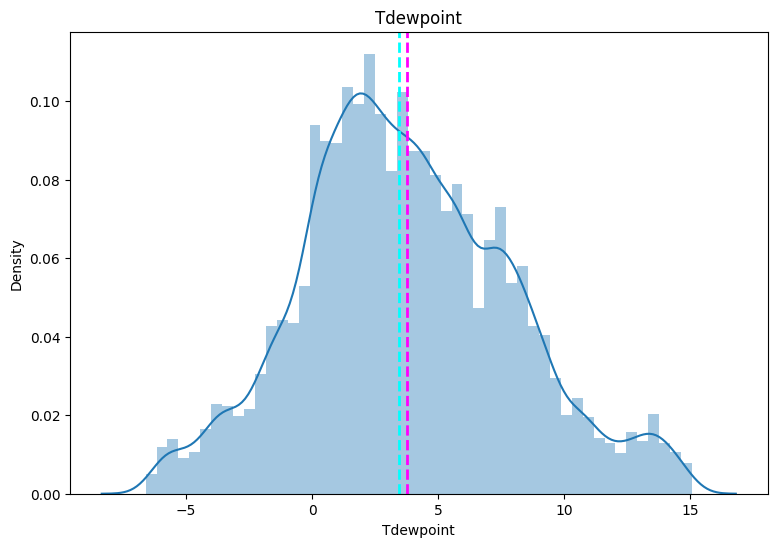

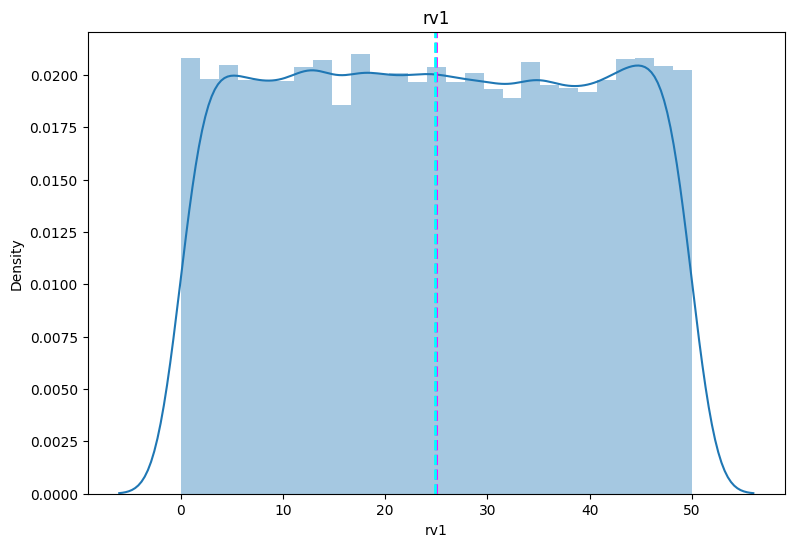

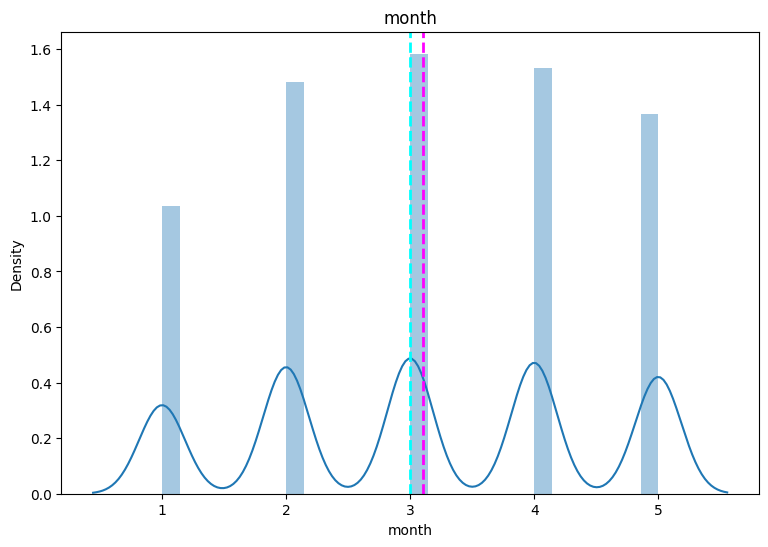

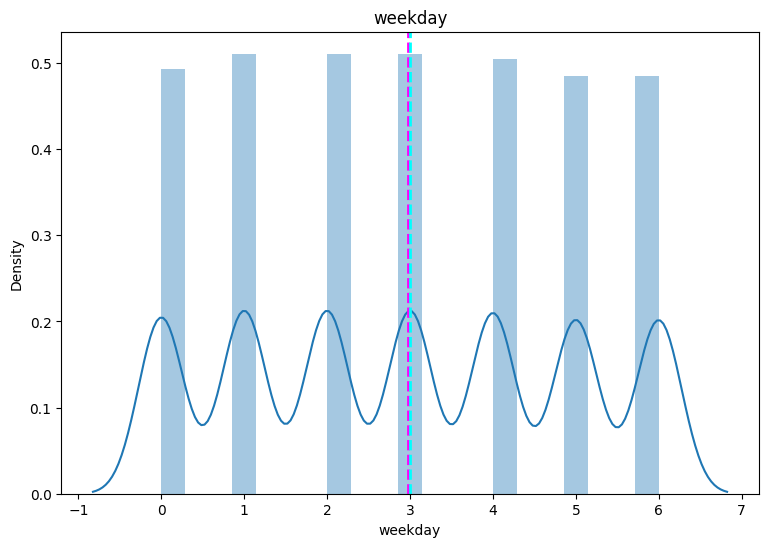

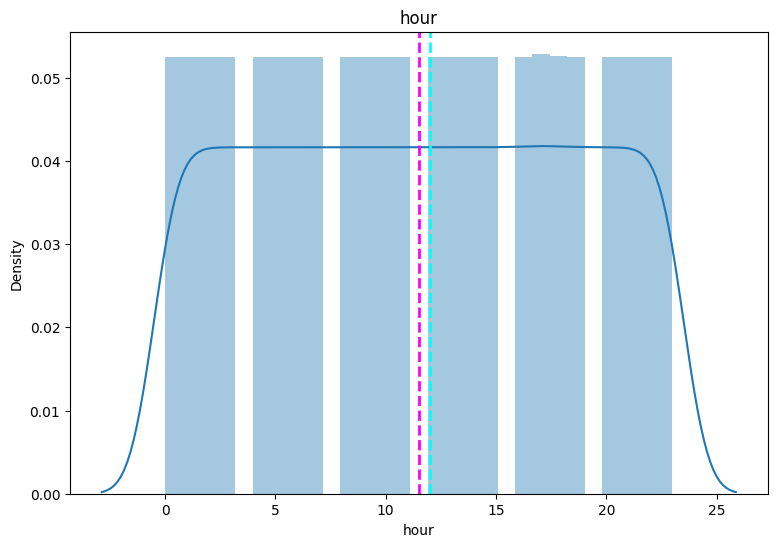

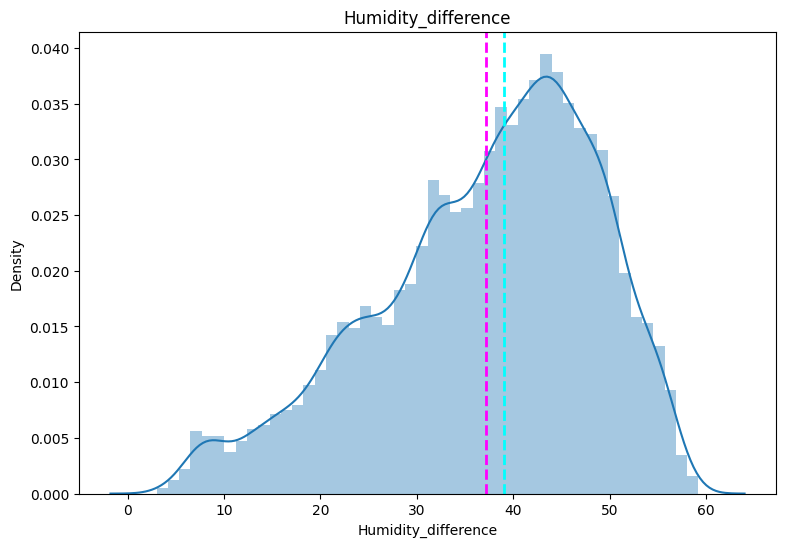

In [64]:
#check distribution  of all independent features
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [65]:
#measure the skewness of all features
df_removed.skew(axis=0,skipna=True)

Appliances             1.156157
Windspeed              0.790130
Tdewpoint              0.239017
rv1                    0.004945
month                 -0.067969
weekday                0.019354
hour                  -0.000673
Humidity_difference   -0.591365
dtype: float64

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data
df_removed['Appliances']=df_removed['Appliances'].apply(lambda x:np.sqrt(x))
df_removed['Windspeed']=df_removed['Windspeed'].apply(lambda x:np.log10(x+1))

df_removed['Humidity_difference']=df_removed['Humidity_difference'].apply(lambda x:np.log10(x+1))


In [67]:
df_removed['Humidity_difference'].describe()

count    19735.000000
mean         1.554613
std          0.170321
min          0.601819
25%          1.490649
50%          1.602968
75%          1.671515
max          1.779805
Name: Humidity_difference, dtype: float64

Yes, i think some of the features of the data need to be transformed.

from the skewd data  we can see three columns have skewness above 0.5 or less then -0.5. so we have use log transformation to normalize the the distribution.

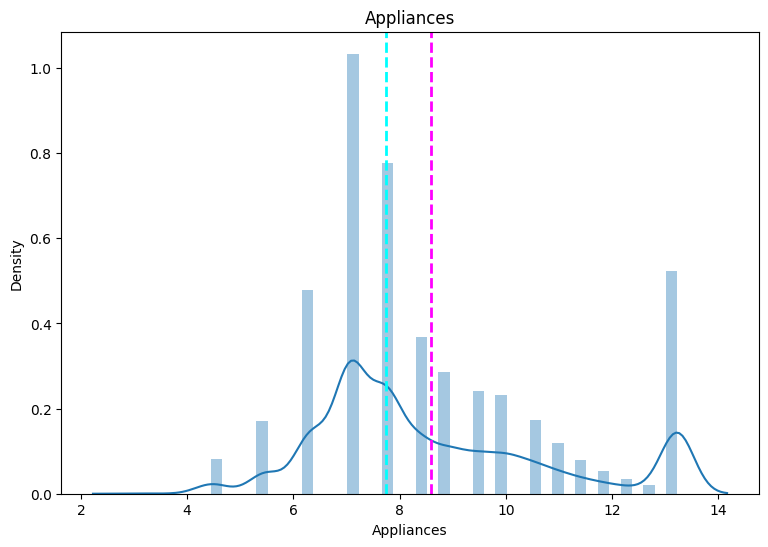

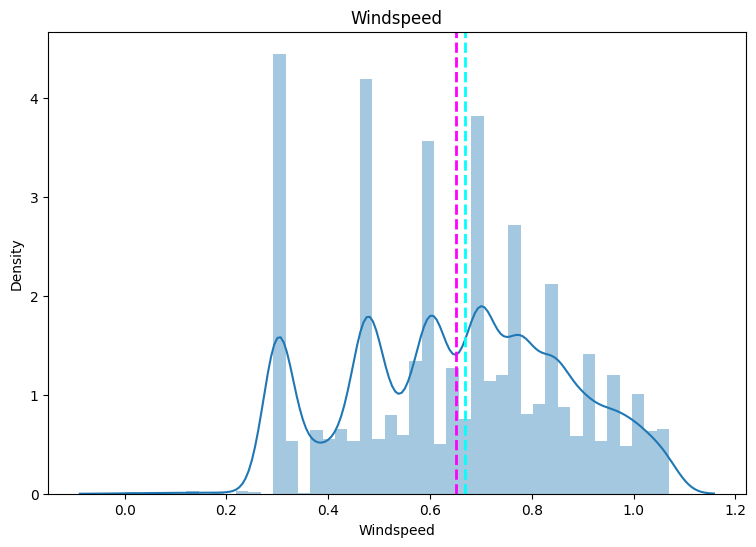

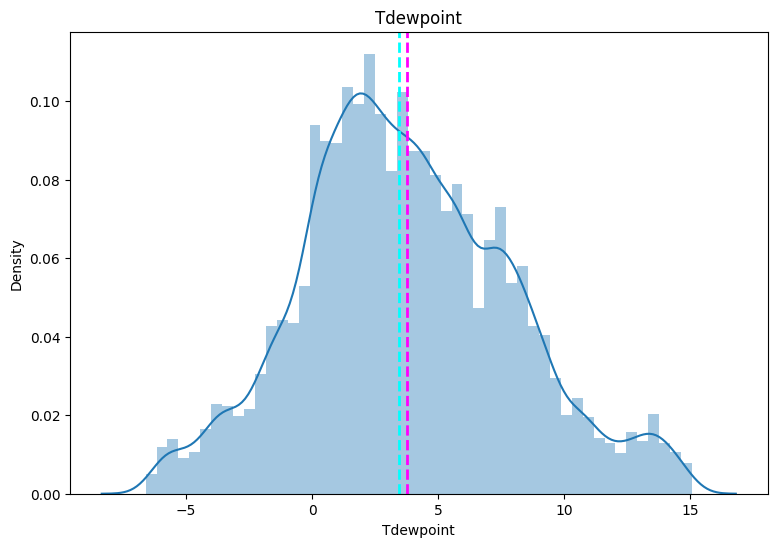

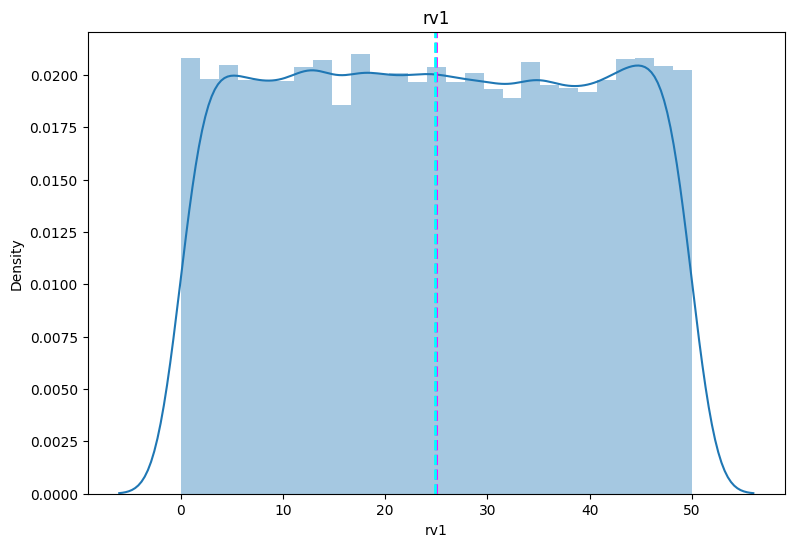

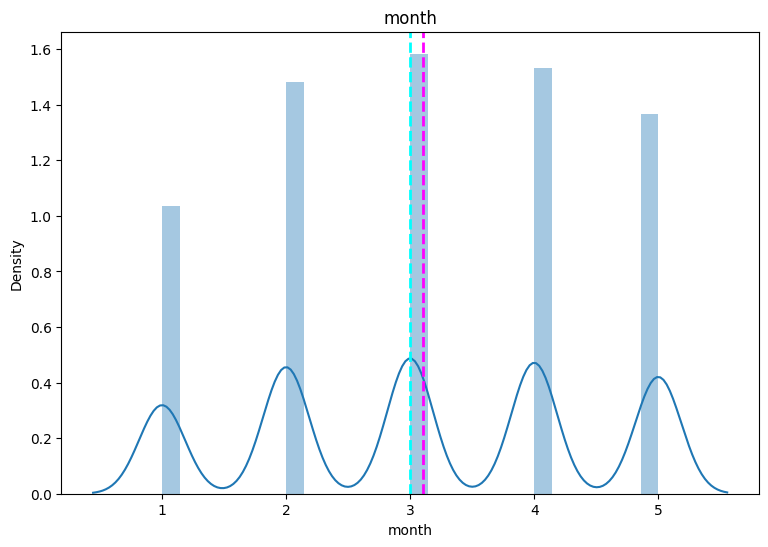

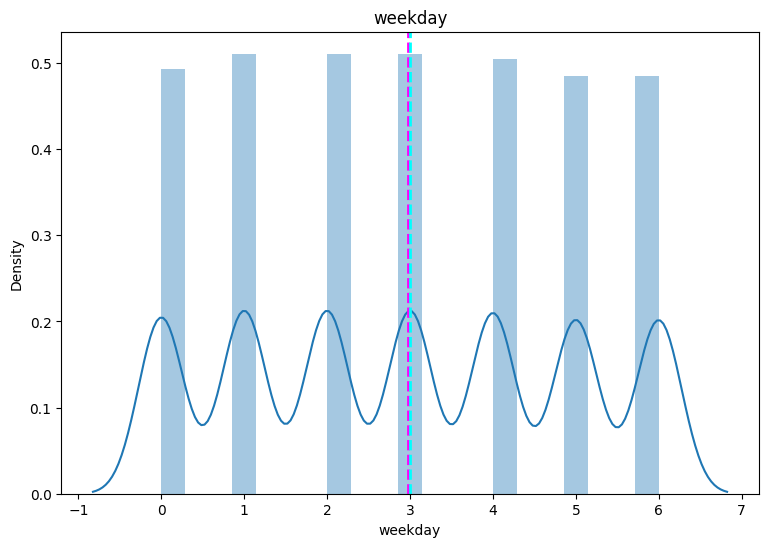

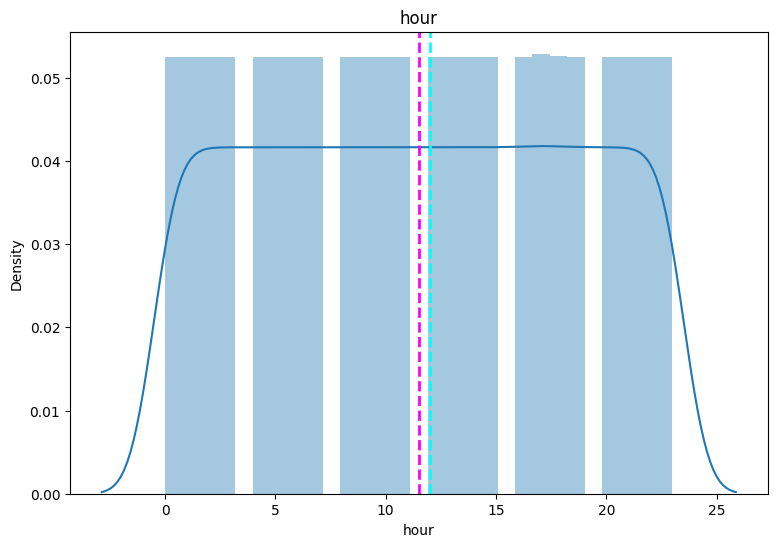

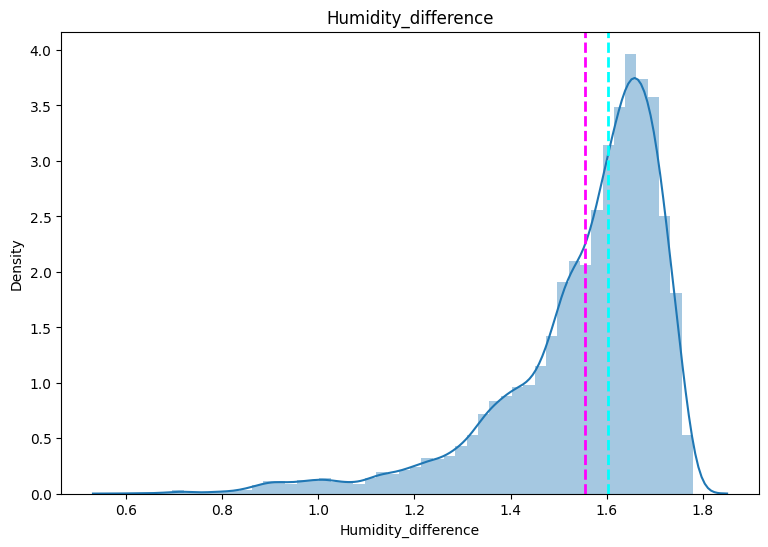

In [68]:
# check the distribution of the features after transformation
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction, to the best of my knowledge, is not required for this dataset.

Essentially, where high dimensions are a problem or a specific point in the algorithm of dimension reduction.In this dataset no such problem is present according to my knoldege.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df_removed.drop('Appliances',axis=1)
y=df_removed['Appliances']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##### What data splitting ratio have you used and why?

The code divides the data into training and testing sets using an 80:20 ratio. This indicates that 80% of the data is utilised to train the model, while 20% is used to test the model.

The ratio is determined by a number of parameters, including the size of the dataset, the complexity of the model, and the amount of computational resources available. In general, a larger training set produces a stronger model, but a smaller testing set produces a higher variance in performance measurements. An 80:20 ratio is an excellent choice since it balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, this dataset is not imbalanced.

In [70]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

### 6. Data Scaling

In [71]:
# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

The data is scaled using Min-Max scaling or normalisation, which scales the data to a range between 0 and 1.

This approach was chosen because it preserves the distribution of the data and the relationships between the features. Furthermore, many machine learning algorithms perform better with scaled data, particularly those that use distance-based metrics or optimisation functions. Scaling was done with Scikit-learn's MinMaxScaler function.

## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [80]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [81]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***